In [ ]:
from pathlib import Path
!ls

data.db  data.db-shm  data.db-wal  static


/usr/local/lib/python3.11/site-packages/lancedb/__init__.py:220: UserWarning: lance is not fork-safe. If you are using multiprocessing, use spawn instead.
  warnings.warn(


In [ ]:
!ls static

'nano_r1-Copy1 (1).ipynb'


/usr/local/lib/python3.11/site-packages/lancedb/__init__.py:220: UserWarning: lance is not fork-safe. If you are using multiprocessing, use spawn instead.
  warnings.warn(


In [ ]:
file=Path('static/nano_r1-Copy1 (1).ipynb').read_text()

In [ ]:
file

'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "# nanoAhaMoment: Single File \\"RL for LLM\\" Library\\n",\n    "Single GPU · No TRL or Verl · Efficient · 3B Base Model · Full Parameter Tuning Implementation of R1-zero training.\\n",\n    "\\n",\n    "Inspired by [TinyZero](https://github.com/Jiayi-Pan/TinyZero) and [Mini-R1](https://www.philschmid.de/mini-deepseek-r1), but designed to be **simpler**, **cleaner**, and **faster**, with every line of code visible and understandable."\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "R1-Zero is arguably the more interesting contribution from the DeepSeek R1 paper. The core idea: take a freshly pre-trained LLM (straight out of the unsupervised pretraining oven) and continue its training using reinforcement learning *without* any human feedback or supervision. The result? A model that starts showing emergent behaviors like self-reflection, verification, backtr

in the file variable there is an example notebook of reinforcement learning. use this to give answers

**AI Prompt**

explain this line: " "zero_optimization": {"stage": 2, "overlap_comm": False},"

**AI Response**

This line is part of the DeepSpeed configuration in the notebook and relates to memory optimization during training.

`"zero_optimization": {"stage": 2, "overlap_comm": False},`

This is configuring ZeRO (Zero Redundancy Optimizer), which is a memory optimization technique developed by Microsoft for training large models efficiently. Let me break it down:

1. `"zero_optimization"` - This enables DeepSpeed's ZeRO optimizer, which helps reduce GPU memory usage during training.

2. `"stage": 2` - ZeRO has different optimization stages (0, 1, 2, and 3), with higher numbers providing more memory savings:
   - Stage 1: Partitions optimizer states across GPUs
   - Stage 2: Partitions both optimizer states AND gradients across GPUs
   - Stage 3: Partitions optimizer states, gradients, AND model parameters

   Here, they're using Stage 2, which offers a good balance between memory efficiency and computational overhead.

3. `"overlap_comm": False` - This setting determines whether communication between GPUs should overlap with computation. When set to `False`, the system won't try to perform communication and computation simultaneously, which can be more stable in some environments but potentially slower.

Would you like me to explain more about how ZeRO works or why someone might choose Stage 2 specifically?

**AI Prompt**

explain more about how ZeRO works

**AI Response**

ZeRO (Zero Redundancy Optimizer) is a memory optimization technology that makes training large models more efficient. Here's how it works:

The core problem ZeRO solves is memory limitation. When training large models, we need to store:
1. Model parameters
2. Gradients
3. Optimizer states (like momentum in Adam)

In traditional distributed training, each GPU has a complete copy of everything, which limits model size.

ZeRO's approach is to partition these components across GPUs rather than replicating them:

- Stage 1: Partitions optimizer states (like Adam's momentum)
- Stage 2: Partitions both optimizer states AND gradients
- Stage 3: Partitions all three: optimizer states, gradients, AND model parameters

During the forward and backward passes, ZeRO efficiently gathers what's needed from other GPUs when necessary.

The beauty is that ZeRO achieves this memory efficiency without sacrificing model quality or training convergence.

Would you like me to explain the specific benefits of each stage, or would you prefer to know about how ZeRO compares to other distributed training approaches?

**AI Prompt**

explai this:  # Evaluate the equation with restricted globals and locals
        result = eval(equation, {"__builtins__": None}, {})

**AI Response**

This line of code is evaluating a mathematical equation string in a secure way. Let me break it down:

```python
result = eval(equation, {"__builtins__": None}, {})
```

The `eval()` function in Python takes a string and executes it as Python code. In this case, it's being used to calculate the result of a mathematical equation stored in the variable `equation` (which might contain something like "2 + 3 * 4").

However, using `eval()` can be dangerous because it could execute any Python code, including harmful commands. To make it safer, this code is restricting what `eval()` can access:

1. `{"__builtins__": None}` - This removes access to all built-in Python functions and classes, preventing the equation from using functions like `open()` that could access files.

2. `{}` - This empty dictionary means no local variables are provided to the evaluation environment.

Together, these restrictions make `eval()` much safer by limiting it to only perform mathematical operations without access to system functions or external resources.

Is there a specific part of this security approach you'd like me to explain further?

**AI Prompt**

does ast literal_eval has similar functionality?

**AI Response**

Yes, `ast.literal_eval()` has a similar security-focused purpose, but with important differences:

`ast.literal_eval()` is a safer alternative to `eval()` because it only evaluates Python literal structures - specifically:
- Strings
- Numbers
- Tuples
- Lists
- Dictionaries
- Booleans
- None

Unlike regular `eval()`, `ast.literal_eval()` will not execute arbitrary code or operations. It only parses and evaluates these literal data structures.

For example:
```python
import ast
ast.literal_eval('{"a": 1, "b": 2}')  # Works - returns a dictionary
ast.literal_eval('2 + 2')             # Raises ValueError - not a literal
```

The key difference is that `ast.literal_eval()` cannot evaluate mathematical expressions or operations, while the restricted `eval()` in the original code can perform calculations.

Would you like to see how you might use `ast.literal_eval()` in practice, or would you prefer to understand when to choose one over the other?

**AI Prompt**

explain this: " advantages = [
            [resp_adv] * len(resp) 
            for resp_adv, resp in zip(response_advantages, response_token_ids)
        ]"

**AI Response**

This code is creating a list of advantages for each token in a response, which is commonly used in reinforcement learning for language models. Let me break it down:

```python
advantages = [
    [resp_adv] * len(resp) 
    for resp_adv, resp in zip(response_advantages, response_token_ids)
]
```

Here's what's happening:

1. `response_advantages` is likely a list of scalar values (one per response), representing how good each entire response was.

2. `response_token_ids` is a list of lists, where each inner list contains the token IDs that make up a response.

3. The list comprehension loops through pairs of (advantage value, token list) using `zip()`.

4. For each pair, it creates a new list by repeating the advantage value (`resp_adv`) for every token in that response.

5. The result is a list of lists, where each inner list has the same advantage value repeated for every token in the corresponding response.

This is creating a per-token advantage signal, where every token in the same response gets the same advantage value. This is a common approach in RL for language models like PPO or REINFORCE, where we need to assign credit to each token decision.

Would you like me to explain why this approach is used in reinforcement learning for language models?

**AI Prompt**

explain this: "As you can see, the input_ids of this single exmaple is repeated in all of generated episodes"

**AI Response**

This statement refers to how input prompts are handled when generating multiple responses in reinforcement learning for language models.

When it says "the input_ids of this single example is repeated in all of generated episodes," it means:

1. For a single input prompt (represented as "input_ids"), the model generates multiple different responses.

2. Each of these (input, response) pairs is considered a separate "episode" for training purposes.

3. The same exact input prompt is reused across all these episodes, while the responses differ.

This is a key aspect of how algorithms like RLHF (Reinforcement Learning from Human Feedback) or R1-Zero (as seen in the notebook) work. The model tries different ways of responding to the same prompt, and learns which responses are better based on the reward signals.

It's similar to how a student might try multiple approaches to solve the same math problem, learning which approaches work better through feedback.

Would you like me to explain more about why this approach is used in reinforcement learning for language models?

**AI Prompt**

how is advantege calculated in more complex setting. Here I can assess the format and if all numbers were used but in real conversations it is difficult to say what to assess

**AI Response**

In more complex settings like real conversations, calculating advantages becomes much more nuanced. Here's how it typically works:

For conversational AI, advantages are calculated based on various reward signals:

1. **Human Feedback**: 
   - Direct ratings from human evaluators
   - Preferences between different model responses (A vs B comparisons)
   - This forms the basis of RLHF (Reinforcement Learning from Human Feedback)

2. **Proxy Rewards**:
   - Helpfulness: Does the response actually address the question?
   - Harmlessness: Does the response avoid problematic content?
   - Truthfulness: Is the information accurate?
   - Coherence: Does the response make logical sense?

3. **Reward Models**:
   - A separate neural network is trained to predict human preferences
   - This model assigns scores to responses, replacing direct human evaluation
   - The reward model itself is trained on human preference data

4. **Composite Rewards**:
   - Multiple reward signals are often combined with different weights
   - For example: Total_Reward = 0.7*Helpfulness + 0.2*Safety + 0.1*Conciseness

Would you like me to explain more about how reward models are trained, or how these complex advantages are used in the training process?

**AI Prompt**

how reward models are trained

**AI Response**

Reward models are trained through a multi-step process that converts human preferences into a numerical scoring system. Here's how it works:

1. **Data Collection**:
   - Human evaluators are shown a prompt and two different AI responses
   - They select which response they prefer (or rate them individually)
   - This creates a dataset of preference pairs: (prompt, response_A, response_B, human_preference)

2. **Model Architecture**:
   - The reward model typically uses the same architecture as the language model
   - It takes a prompt and response as input
   - It outputs a single scalar value representing the "quality" of the response

3. **Training Objective**:
   - The model is trained to predict human preferences
   - For preference pairs, it learns to assign a higher score to the preferred response
   - The loss function is often a simple binary classification loss:
     - If humans preferred A over B, train the model so that R(A) > R(B)

4. **Fine-tuning Details**:
   - Bradley-Terry models are commonly used to convert pairwise preferences to scores
   - The training objective is typically: log(sigmoid(R(preferred) - R(non-preferred)))
   - Additional regularization may be used to prevent reward hacking

Would you like me to explain how these trained reward models are then used in the reinforcement learning process, or would you prefer to know about challenges in reward model training?

**AI Prompt**

what in the PPO formula is advantage?

**AI Response**

In the PPO (Proximal Policy Optimization) formula, the advantage is a crucial component that tells the model how much better or worse an action was compared to what was expected.

The core PPO objective function looks like this:

L^CLIP(θ) = Ê_t[ min(r_t(θ)A_t, clip(r_t(θ), 1-ε, 1+ε)A_t) ]

Where:
- A_t is the advantage term
- r_t(θ) is the probability ratio between new and old policies

The advantage A_t represents how much better the taken action was compared to the baseline (value function). It's calculated as:

A_t = R_t - V(s_t)

Where:
- R_t is the actual return (reward) received after taking the action
- V(s_t) is the value function's prediction of how good the state was

In language models:
- Actions are token selections
- The advantage tells the model if generating a particular token led to a better-than-expected outcome

Would you like me to explain how advantages are specifically calculated for language models, or how the clipping in PPO helps stabilize training?

**AI Prompt**

so does it meant that PPO shows how much this step improves compared previous step also considering probability ratio?

**AI Response**

That's close, but let me clarify how PPO works:

PPO doesn't directly compare to the "previous step" in training. Instead, it compares:

1. The action (token) that was actually chosen
2. Against what the model expected that action to be worth

The advantage term (A_t) measures this difference: "Was this action better or worse than expected?"

The probability ratio (r_t) is a separate component that compares:
- How likely the new policy would choose this action
- Versus how likely the old policy (before update) would choose it

PPO multiplies these together (r_t × A_t) to determine how to update the policy:
- If advantage is positive (good action): increase probability, but not too much
- If advantage is negative (bad action): decrease probability, but not too much

The "not too much" part comes from the clipping in PPO, which prevents drastic changes to the policy in a single update.

So PPO doesn't measure improvement between steps - it measures if specific actions were better than expected, while controlling how much the policy can change at once.

Does that distinction make sense?

**AI Prompt**

what is policy meaning here? and how it is measured how likely new policy would choose this action?

**AI Response**

In reinforcement learning, "policy" refers to the strategy or decision-making function that determines what action to take in a given state.

For language models:
- The policy is the model itself - the neural network with all its parameters
- It determines the probability distribution over the next token given the previous tokens

The policy is measured in terms of probabilities:
- For each possible next token, the model outputs a probability
- These probabilities sum to 1 (representing all possible choices)

When we say "how likely a policy would choose an action," we mean:
- What probability does the model assign to a specific token?
- For example, if the model gives "the" a 0.2 probability, that's how likely it would choose that token

The "new policy" vs "old policy" comparison:
- Old policy: the model before the current update step
- New policy: the model after we've calculated gradients but before applying them
- We calculate the ratio: probability(token|new_policy) ÷ probability(token|old_policy)

This ratio tells us how much the probability of selecting that token has changed during this update.

Does that clarify what policy means in this context?

**AI Prompt**

so basically I sum all probablities based on new policy and old  one, divide them and multiply with advatange?

**AI Response**

Not quite. Let me clarify how the calculation works:

For PPO with language models, we don't sum all probabilities. Instead, for each token that was actually generated:

1. We calculate the probability of that specific token according to:
   - The current (new) policy: p_new(token)
   - The old policy that generated it: p_old(token)

2. We compute the ratio for each token:
   - r = p_new(token) / p_old(token)

3. We multiply this ratio by the advantage for that token:
   - r × A

4. This is then clipped to stay within [1-ε, 1+ε] if needed:
   - min(r × A, clip(r, 1-ε, 1+ε) × A)

This is done for each token in the sequence, and then averaged.

The key point is that we only care about the probabilities of the tokens that were actually chosen, not the sum of all possible token probabilities.

Does that make more sense now?

**AI Prompt**

yes. Please now explain this: "In general PPO, multiple gradient steps might be taken using the same batch of episodes. However, in our case, we apply only one gradient step per iteration using freshly sampled episodes"

**AI Response**

This statement is explaining a specific implementation choice for PPO in the context of language model training. Let me break it down:

Standard PPO implementation:
- Collect a batch of experiences (episodes)
- Use this SAME batch for MULTIPLE gradient update steps
- This reuses data efficiently but requires careful trust region constraints

The approach described in the statement:
- Collect a batch of episodes
- Use it for ONLY ONE gradient update step
- Then discard it and collect fresh episodes for the next update

The key differences:

1. Data efficiency: 
   - Standard PPO: More efficient with data (reuses the same experiences)
   - This implementation: Less efficient but simpler (generates fresh data each time)

2. Stability considerations:
   - Standard PPO: Needs careful clipping to prevent overtraining on the same data
   - This implementation: Less risk of overfitting to a specific batch since data is always fresh

3. Computational trade-offs:
   - Standard PPO: More computation on optimization, less on data generation
   - This implementation: More computation on generating new data, less on optimization

This "one update per batch" approach is often used in language model RL training because generating new data from the language model is relatively cheap compared to the benefits of fresh examples.

Would you like me to explain why this approach might be preferred specifically for language models?

**AI Prompt**

yes

**AI Response**

This approach of using fresh data for each update is preferred for language models for several key reasons:

1. **Rich Output Space**:
   - Language models have an enormous output space (50,000+ tokens)
   - Each prompt can generate countless valid responses
   - Fresh sampling explores this vast space better than reusing data

2. **Mode Collapse Risk**:
   - Training too long on the same examples can cause "mode collapse"
   - The model might learn to generate only a narrow set of responses
   - Fresh examples maintain diversity in the training signal

3. **Efficient Generation**:
   - Modern language models can generate new responses very quickly
   - The computational cost of generating fresh data is relatively low
   - This makes data reuse less necessary than in other RL domains

4. **KL Divergence Concerns**:
   - Language model RL often uses KL penalties to prevent drift from the base model
   - Multiple updates on the same data can cause excessive drift
   - Fresh data helps maintain a more stable learning trajectory

5. **Generalization Benefits**:
   - Fresh examples help the model generalize better
   - This prevents overfitting to specific prompts or response patterns

Would you like me to explain more about how KL divergence penalties work in language model RL, or any other aspect of this approach?

**AI Prompt**

I dont understand why ratio is 1, we still generate new tokens and we have old ones

**AI Response**

You're right to question this. Let me clarify about the probability ratio in PPO:

The ratio r = p_new(token) / p_old(token) is not automatically 1. It varies based on how the policy has changed.

Here's what happens:

1. We sample responses using the current policy (let's call it policy_A)
2. We calculate the probabilities of each token according to policy_A
3. We then compute gradients to update the policy (creating policy_B)
4. Before applying these gradients, we calculate what the probabilities would be under policy_B
5. The ratio compares these: r = p_policy_B(token) / p_policy_A(token)

Initially, before any updates, the ratio would be close to 1 because the policies are nearly identical. But as training progresses, this ratio can deviate from 1.

The clipping in PPO (keeping the ratio between 1-ε and 1+ε) prevents this ratio from getting too far from 1, which helps maintain stable training.

Perhaps the confusion stems from the "one update per batch" approach? Even with fresh data each time, we still need to calculate this ratio during each update.

Does that help clarify why the ratio isn't just 1?

**AI Prompt**

I mean the part: "In general PPO, multiple gradient steps might be taken using the same batch of episodes. However, in our case, we apply only one gradient step per iteration using freshly sampled episodes. That means:" here ratio is stated as 1. how come?

**AI Response**

I see the confusion now. Let me look at the full context from the notebook.

The statement you're referring to doesn't actually say the ratio is 1. What it's explaining is:

1. Standard PPO: Collect batch → Update multiple times → Collect new batch
2. Their approach: Collect batch → Update once → Collect new batch

This change in approach doesn't make the ratio automatically 1. The ratio r = p_new(token) / p_old(token) still needs to be calculated during that single update step.

If you're seeing something that explicitly states "the ratio is 1" somewhere in the text, that might be referring to:

1. The initial ratio before any updates (which starts close to 1)
2. The center point of the clipping range (which is 1, with bounds 1-ε and 1+ε)
3. Or possibly a simplification for explanation purposes

Without seeing the exact text that states "ratio is 1," it's hard to pinpoint the exact context, but the one-update-per-batch approach itself doesn't make the ratio automatically 1.

Could you share the complete passage where it mentions the ratio being 1?

**AI Prompt**

but on next line it states: "Since the ratio is exactly 1:"

**AI Response**

Ah, now I understand the confusion! If the text says "Since the ratio is exactly 1" right after explaining their one-update-per-batch approach, there's an important technical detail being explained.

Here's what's happening:

In their implementation, they're using a specific technique where:

1. They generate responses using the current policy (policy_old)
2. They calculate gradients for updating the policy
3. But before applying these gradients, they compute what the new probabilities would be
4. They use these "hypothetical new probabilities" to calculate the ratio

Since they haven't actually updated the model parameters yet when calculating the ratio, they're comparing:
- The probability from the model if it were updated (p_new)
- Against the probability from the same model before update (p_old)

This is a computational trick that makes the ratio exactly 1 at the beginning of each iteration, because they're essentially comparing the model to itself before any parameters have changed.

This approach simplifies the implementation but still allows them to compute how the ratio would change after the update.

Does that explanation make sense for why they're saying the ratio is exactly 1?

**AI Prompt**

what is k3 estimator?

**AI Response**

The K3 estimator (sometimes written as K³) is a specialized technique used in reinforcement learning for language models. It's an alternative to traditional policy gradient methods that offers certain computational advantages.

Key features of the K3 estimator:

1. **Purpose**: It's designed to estimate policy gradients more efficiently, particularly for large language models.

2. **Mathematical Basis**: K3 stands for "Kullback-Leibler (KL) kernel", and it uses properties of the KL divergence between probability distributions.

3. **Advantage over traditional methods**:
   - Reduces variance in gradient estimates
   - Can be more computationally efficient
   - Often provides better sample efficiency

4. **Implementation**: It typically involves a specific way of weighting samples based on their likelihood under both the current policy and a reference policy.

The K3 estimator is relatively recent and more specialized than standard techniques like PPO or REINFORCE, so it's less commonly discussed in introductory RL materials.

Would you like me to explain how the K3 estimator compares to more traditional policy gradient methods, or discuss its mathematical foundations in more detail?

this is blkog post about k3 estimator article mentions: "Approximating KL Divergence
Posted on 2020/03/07
← back to blog index

This post is about Monte-Carlo approximations of KL divergence.
K
L
[
q
,
p
]
=
∑
x
q
(
x
)
log
⁡
q
(
x
)
p
(
x
)
=
E
x
∼
q
[
log
⁡
q
(
x
)
p
(
x
)
]
KL[q,p]= 
x
∑
​
 q(x)log 
p(x)
q(x)
​
 =E 
x∼q
​
 [log 
p(x)
q(x)
​
 ]
It explains a trick I’ve used in various code, where I approximate 
K
L
[
q
,
p
]
KL[q,p] as a sample average of 
1
2
(
log
⁡
p
(
x
)
−
log
⁡
q
(
x
)
)
2
2
1
​
 (logp(x)−logq(x)) 
2
 , for samples 
x
x from 
q
q, rather the more standard 
log
⁡
q
(
x
)
p
(
x
)
log 
p(x)
q(x)
​
 . This post will explain why this expression is a good (though biased) estimator of KL, and how to make it unbiased while preserving its low variance.

Our options for computing KL depend on what kind of access we have to 
p
p and 
q
q. Here, we’ll be assuming that we can compute the probabilities (or probability densities) 
p
(
x
)
p(x) and 
q
(
x
)
q(x) for any 
x
x, but we can’t calculate the sum over 
x
x analytically. Why wouldn’t we be able to calculate it analytically?

Computing it exactly requires too much computation or memory.
There’s no closed form expression.
We can simplify code by just storing the log-prob, not the whole distribution. This is a reasonable choice if KL is just being used as a diagnostic, as is often the case in reinforcement learning.
The most common strategy for estimating sums or integrals is to use a Monte-Carlo estimate. Given samples 
x
1
,
x
2
,
⋯
∼
q
x 
1
​
 ,x 
2
​
 ,⋯∼q, how can we construct a good estimate?

A good estimator is unbiased (it has the right mean) and has low variance. We know that one unbiased estimator (under samples from 
q
q) is 
log
⁡
q
(
x
)
p
(
x
)
log 
p(x)
q(x)
​
 . However, it has high-variance, as it’s negative for half of the samples, whereas KL is always positive. Let’s call this naive estimator 
k
1
=
log
⁡
q
(
x
)
p
(
x
)
=
−
log
⁡
r
k 
1
​
 =log 
p(x)
q(x)
​
 =−logr, where we’ve defined the ratio 
r
=
p
(
x
)
q
(
x
)
r= 
q(x)
p(x)
​
  that’ll appear frequently in the subsequent calculations.

An alternative estimator, which has lower variance but is biased, is 
1
2
(
log
⁡
p
(
x
)
q
(
x
)
)
2
=
1
2
(
log
⁡
r
)
2
2
1
​
 (log 
q(x)
p(x)
​
 ) 
2
 = 
2
1
​
 (logr) 
2
 . Let’s call this estimator 
k
2
k 
2
​
 . Intuitively, 
k
2
k 
2
​
  seems to be better because each sample tells you how far apart 
p
p and 
q
q are, and it’s always positive. Empirically, 
k
2
k 
2
​
  does indeed have much lower variance than 
k
1
k 
1
​
 , and also has remarkably low bias. (We’ll show this in an experiment below.)

There’s a good reason why estimator 
k
2
k 
2
​
  has low bias: its expectation is an f-divergence. An f-divergence is defined as 
D
f
(
p
,
q
)
=
E
x
∼
q
[
f
(
p
(
x
)
q
(
x
)
)
]
D 
f
​
 (p,q)=E 
x∼q
​
 [f( 
q(x)
p(x)
​
 )] for a convex function 
f
f. KL divergence and various other well-known probability distances are f-divergences. Now here’s the key non-obvious fact: all f-divergences with differentiable 
f
f look like KL divergence up to second order when 
q
q is close to 
p
p. Namely, for a parametrized distribution 
p
θ
p 
θ
​
 ,

D
f
(
p
0
,
p
θ
)
=
f
′
′
(
1
)
2
θ
T
F
θ
+
O
(
θ
3
)
D 
f
​
 (p 
0
​
 ,p 
θ
​
 )= 
2
f 
′′
 (1)
​
 θ 
T
 Fθ+O(θ 
3
 )

where 
F
F is the Fisher information matrix for 
p
θ
p 
θ
​
  evaluated at 
p
θ
=
p
0
p 
θ
​
 =p 
0
​
 .

E
q
[
k
2
]
=
E
q
[
1
2
(
log
⁡
r
)
2
]
E 
q
​
 [k 
2
​
 ]=E 
q
​
 [ 
2
1
​
 (logr) 
2
 ] is the f-divergence where 
f
(
x
)
=
1
2
(
log
⁡
x
)
2
f(x)= 
2
1
​
 (logx) 
2
 , whereas 
K
L
[
q
,
p
]
KL[q,p] corresponds to 
f
(
x
)
=
−
log
⁡
x
f(x)=−logx. It’s easy to check that both have 
f
′
′
(
1
)
=
1
f 
′′
 (1)=1, so both look like the same quadratic distance function for 
p
≈
q
p≈q.

Is it possible to write down a KL divergence estimator that is unbiased but also low variance? The general way to lower variance is with a control variate. I.e., take 
k
1
k 
1
​
  and add something that has expectation zero but is negatively correlated with 
k
1
k 
1
​
 . The only interesting quantity that’s guaranteed to have zero expectation is 
p
(
x
)
q
(
x
)
−
1
=
r
−
1
q(x)
p(x)
​
 −1=r−1. So for any 
λ
λ, the expression 
−
log
⁡
r
+
λ
(
r
−
1
)
−logr+λ(r−1) is an unbiased estimator of 
K
L
[
q
,
p
]
KL[q,p]. We can do a calculation to minimize the variance of this estimator and solve for 
λ
λ. But unfortunately we get an expression that depends on 
p
p and 
q
q and is hard to calculate analytically.

However, we can choose a good 
λ
λ using a simpler strategy. Note that since log is concave, 
log
⁡
(
x
)
≤
x
−
1
log(x)≤x−1. Therefore, if we let 
λ
=
1
λ=1, the expression above is guaranteed to be positive. It measures the vertical distance between 
log
⁡
(
x
)
log(x) and its tangent. This leaves us with the estimator 
k
3
=
(
r
−
1
)
−
log
⁡
r
k 
3
​
 =(r−1)−logr.

The idea of measuring distance by looking at the difference between a convex function and its tangent plane appears in many places. It’s called a Bregman divergence and has many beautiful properties.

We can generalize the above idea to get a good, always-positive estimator for any f-divergence, most notably the other KL divergence 
K
L
[
p
,
q
]
KL[p,q] (note that 
p
p and 
q
q are switched here). Since 
f
f is by convex, and and 
E
q
[
r
]
=
1
E 
q
​
 [r]=1, the following is an estimator of the f-divergence: 
f
(
r
)
−
f
′
(
1
)
(
r
−
1
)
f(r)−f 
′
 (1)(r−1). This is always positive because it’s the distance between 
f
f and its tangent at 
r
=
1
r=1, and convex functions lie above their tangent lines. Now 
K
L
[
p
,
q
]
KL[p,q] corresponds to 
f
(
x
)
=
x
log
⁡
x
f(x)=xlogx, which has 
f
′
(
1
)
=
1
f 
′
 (1)=1, leaving us with the estimator 
r
log
⁡
r
−
(
r
−
1
)
rlogr−(r−1).

In summary, we have the following estimators (for samples 
x
∼
q
x∼q, and 
r
=
p
(
x
)
q
(
x
)
r= 
q(x)
p(x)
​
 ):

K
L
[
p
,
q
]
:
r
log
⁡
r
−
(
r
−
1
)
KL[p,q]:rlogr−(r−1)
K
L
[
q
,
p
]
:
(
r
−
1
)
−
log
⁡
r
KL[q,p]:(r−1)−logr
Now let’s compare the bias and variance of the three estimators for 
K
L
[
q
,
p
]
KL[q,p]. Suppose 
q
=
N
(
0
,
1
)
q=N(0,1), 
p
=
N
(
0.1
,
1
)
p=N(0.1,1). Here, the true KL is 0.005.

bias/true	stdev/true
k1	0	20
k2	0.002	1.42
k3	0	1.42
Note that the bias of k2 is incredibly low here: it’s 0.2%.

Now let’s try for a larger true KL divergence. 
p
=
N
(
1
,
1
)
p=N(1,1) gives us a true KL divergence of 0.5.

bias/true	stdev/true
k1	0	2
k2	0.25	1.73
k3	0	1.7
Here, the bias of k2 is much larger. k3 has even lower standard deviation than k2 while being unbiased, so it appears to be a strictly better estimator.

Here’s the code I used to get these results:

import torch.distributions as dis
p = dis.Normal(loc=0, scale=1)
q = dis.Normal(loc=0.1, scale=1)
x = q.sample(sample_shape=(10_000_000,))
truekl = dis.kl_divergence(p, q)
print("true", truekl)
logr = p.log_prob(x) - q.log_prob(x)
k1 = -logr
k2 = logr ** 2 / 2
k3 = (logr.exp() - 1) - logr
for k in (k1, k2, k3):
    print((k.mean() - truekl) / truekl, k.std() / truekl)
Thanks to Jacob Hilton and Nisan Stiennon for helpful feedback."

**AI Prompt**

what is this k3 blog post trying to say

**AI Response**

The blog post is explaining different ways to estimate the KL divergence between two probability distributions when you can only sample from one of them. Here's the key points:

1. KL divergence is important in machine learning, but can be difficult to calculate directly.

2. The post compares three different estimators:
   - k1: The standard estimator (-log r), which is unbiased but has high variance
   - k2: A squared-log estimator (1/2 * (log r)²), which has lower variance but is biased
   - k3: A new estimator ((r-1) - log r), which is both unbiased AND has low variance

3. The author shows that k3 is a better estimator in practice:
   - It's unbiased (gives the right answer on average)
   - It has much lower variance than k1 (less noisy results)
   - It's always positive (unlike k1 which can be negative)
   - It's based on Bregman divergence (measuring distance between a function and its tangent)

4. The post includes experimental results showing that k3 outperforms both k1 and k2, especially when the distributions are further apart.

This matters for reinforcement learning because KL divergence is often used as a constraint or penalty term when updating policies, and having a better estimator can lead to more stable and efficient training.

Would you like me to explain more about how this specifically relates to PPO or other RL algorithms?

**AI Prompt**

explain

**AI Response**

I'll explain how the K3 estimator relates to reinforcement learning algorithms like PPO:

In reinforcement learning for language models, we often need to measure the divergence between the new policy and the old policy. This is where KL divergence comes in.

The challenge is that calculating KL divergence exactly is often impractical, so we need to estimate it from samples. This is where the different estimators (k1, k2, k3) become relevant.

When using PPO for language models:

1. We need to ensure the new policy doesn't deviate too much from the old policy
2. This deviation is typically measured using KL divergence
3. The KL penalty is added to the loss function

The traditional way to estimate this KL term (the k1 estimator) can have high variance, which makes training unstable. The k3 estimator provides a more stable alternative that:

1. Has lower variance (less noisy gradients)
2. Is unbiased (doesn't systematically push the policy in the wrong direction)
3. Is always positive (important since KL divergence should never be negative)

By using the k3 estimator in RL algorithms, we can get more reliable policy updates, which leads to:
- More stable training
- Better sample efficiency
- Potentially better final policies

Would you like me to explain how you might implement this in practice, or discuss other aspects of KL estimation in RL?

**AI Prompt**

how to implement this in practice

**AI Response**

Here's how to implement the K3 estimator in practice for RL with language models:

First, let's define what we need:
- `log_probs_new`: Log probabilities of tokens under the current policy
- `log_probs_old`: Log probabilities of the same tokens under the old policy

Step 1: Calculate the probability ratio (r)
```python
# Convert log probabilities to probability ratio
ratio = torch.exp(log_probs_new - log_probs_old)
```

Step 2: Implement the K3 estimator
```python
# K3 estimator: (r - 1) - log(r)
kl_k3 = (ratio - 1) - (log_probs_new - log_probs_old)
```

Step 3: Use this in your PPO loss function
```python
# Standard PPO components
policy_loss = -torch.min(
    ratio * advantages,
    torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon) * advantages
)

# Add KL penalty using K3 estimator
kl_penalty = beta * kl_k3.mean()
total_loss = policy_loss.mean() + kl_penalty
```

The key implementation details:
1. The K3 estimator is computed token by token
2. `beta` controls the strength of the KL penalty
3. This can be used alongside or instead of the PPO clipping mechanism

Would you like me to explain how to adjust the `beta` parameter during training, or discuss any other implementation details?

**AI Prompt**

how is k3 derived?

**AI Response**

The K3 estimator is derived through a clever application of control variates to reduce variance while maintaining unbiasedness. Here's the derivation:

Starting point:
- We want to estimate KL[q,p] = E[log(q(x)/p(x))] where x ~ q
- The standard estimator (k1) is -log(r) where r = p(x)/q(x)

Step 1: Identify a zero-mean term
The key insight is to find something with zero expectation under q. Since E[p(x)/q(x)] = 1 when x ~ q, we know that E[r-1] = 0.

Step 2: Create a control variate
For any constant λ, the estimator -log(r) + λ(r-1) is still unbiased because we're adding something with zero expectation.

Step 3: Choose λ to minimize variance
The optimal λ depends on the distributions and is hard to calculate analytically.

Step 4: Use a mathematical inequality
Since log is concave, we know that log(x) ≤ x-1 for all x > 0.

Step 5: Set λ = 1
With λ = 1, we get:
k3 = -log(r) + (r-1) = (r-1) - log(r)

This gives us a positive estimator (since log(x) ≤ x-1), which helps reduce variance.

The beauty of this approach is that it creates an estimator that:
- Remains unbiased (unlike k2)
- Has much lower variance than k1
- Is always positive (which aligns with the fact that KL divergence is always non-negative)

This is an example of a Bregman divergence, which measures the distance between a convex function and its tangent.

Would you like me to explain the mathematical intuition behind why this works so well?

**AI Prompt**

yes

**AI Response**

The mathematical intuition behind why K3 works so well comes from a beautiful geometric interpretation:

1. **Visualizing the estimators**:
   Imagine plotting the function f(r) = -log(r) on a graph. The standard KL estimator (k1) is just the value of this function at a specific point r = p(x)/q(x).

2. **Understanding variance sources**:
   The high variance of k1 comes from the steep slope of -log(r) as r approaches zero. Small changes in r can cause huge swings in the estimate.

3. **The tangent line trick**:
   The K3 estimator measures the vertical distance between:
   - The function -log(r)
   - And its tangent line at r = 1 (which is 1-r)

4. **Geometric meaning**:
   This vertical distance is a Bregman divergence, which has a deep connection to information theory. It represents how much the function "curves away" from its linear approximation.

5. **Why it reduces variance**:
   - When r is close to 1 (p ≈ q), both k1 and k3 give similar values (as expected)
   - When r is far from 1, k3 grows more moderately than k1
   - This "dampening" effect on extreme values is what reduces variance

6. **Preserving information**:
   Despite this dampening, k3 still captures the essential information about the divergence between distributions, just in a more numerically stable way.

Would you like me to explain how this geometric interpretation applies specifically to language model training?

**AI Prompt**

why is  E[p(x)/q(x)] = 1?

**AI Response**

The fact that E[p(x)/q(x)] = 1 when x ~ q is a fundamental property in probability theory. Here's why it's true:

First, let's write out what this expectation means:

E[p(x)/q(x)] = ∫ (p(x)/q(x)) · q(x) dx

When we distribute q(x) inside the integral:

= ∫ p(x) dx

And now we're simply integrating a probability density function p(x) over its entire domain, which equals 1 by definition:

= 1

This works because:
1. The integral of any valid probability density function over its entire domain equals 1
2. When we weight the ratio p(x)/q(x) by q(x), it simplifies to just p(x)

This property is crucial for many statistical methods, including importance sampling, where we use one distribution to estimate properties of another.

In the context of the K3 estimator, this property allows us to use (r-1) as a control variate with zero expectation, which helps reduce variance without introducing bias.

Does this explanation help clarify why E[p(x)/q(x)] = 1?

**AI Prompt**

explain this: ∫ (p(x)/q(x)) · q(x) dx

**AI Response**

Let me break down the expression ∫ (p(x)/q(x)) · q(x) dx step by step:

1. **What this represents**: 
   This is the mathematical definition of the expectation E[p(x)/q(x)] when x is sampled from distribution q.

2. **The components**:
   - p(x) is the probability density function of distribution p
   - q(x) is the probability density function of distribution q
   - p(x)/q(x) is the ratio of these two densities
   - dx indicates we're integrating over all possible values of x

3. **The multiplication**:
   We have (p(x)/q(x)) · q(x), which simplifies to:
   (p(x)/q(x)) · q(x) = p(x)

4. **The integral**:
   After simplification, we have ∫ p(x) dx
   This means "sum up p(x) over all possible values of x"

5. **The result**:
   Since p(x) is a probability density function, its integral over the entire domain equals 1.
   Therefore, ∫ p(x) dx = 1

This is a fundamental property in probability: the integral of any valid probability density function over its entire domain equals 1 (the total probability is 100%).

Does this help clarify what the expression means and why it equals 1?

**AI Prompt**

what is integral

**AI Response**

An integral is a mathematical concept that represents the area under a curve. It's a fundamental operation in calculus that allows us to:

1. **Find the total amount** of something that varies continuously
2. **Calculate the accumulated effect** of a quantity that changes over time or space
3. **Determine the area** under a curve on a graph

The notation ∫ f(x) dx means "find the sum of all the values of f(x) over the range of x."

Think of it like this:
- If you have a function that gives you the speed of a car at each moment in time
- The integral of that function gives you the total distance traveled

There are two main types:
- **Definite integrals** (with specific bounds): ∫[a to b] f(x) dx
- **Indefinite integrals** (without bounds): ∫ f(x) dx

In probability theory, we often use definite integrals over the entire domain of a probability distribution to calculate expectations, totals, or averages.

Would you like me to explain more about how integrals work, or how they're specifically used in probability theory?

**AI Prompt**

can you give simple code example to visualize k3 and k1 effects?

**AI Response**

Here's a simple code example to visualize the K1 and K3 estimators and their effects:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Define our distributions - two normal distributions with different means
mean1, std1 = 0, 1  # Distribution q (we sample from this)
mean2, std2 = 0.5, 1  # Distribution p

# Function to compute the true KL divergence between normal distributions
def true_kl(m1, s1, m2, s2):
    return np.log(s2/s1) + (s1**2 + (m1-m2)**2)/(2*s2**2) - 0.5

# Define our estimators
def k1(r):  # Standard estimator
    return -np.log(r)

def k3(r):  # K3 estimator
    return (r - 1) - np.log(r)

# Generate samples from q
np.random.seed(42)
n_samples = 1000
samples = np.random.normal(mean1, std1, n_samples)

# Calculate r = p(x)/q(x) for each sample
log_q = norm.logpdf(samples, mean1, std1)
log_p = norm.logpdf(samples, mean2, std2)
log_r = log_p - log_q
r = np.exp(log_r)

# Calculate estimates using each method
k1_estimates = k1(r)
k3_estimates = k3(r)

# Compute the true KL divergence
true_kl_value = true_kl(mean1, std1, mean2, std2)

# Plot the distributions of estimates
plt.subplot(2, 2, 1)
plt.hist(k1_estimates, bins=50, alpha=0.7, label=f'K1: μ={k1_estimates.mean():.4f}, σ={k1_estimates.std():.4f}')
plt.axvline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Distribution of K1 Estimates')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(k3_estimates, bins=50, alpha=0.7, label=f'K3: μ={k3_estimates.mean():.4f}, σ={k3_estimates.std():.4f}')
plt.axvline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Distribution of K3 Estimates')
plt.legend()

# Plot the relationship between r and the estimators
r_range = np.linspace(0.1, 3, 1000)
plt.subplot(2, 2, 3)
plt.plot(r_range, k1(r_range), label='K1: -log(r)')
plt.plot(r_range, k3(r_range), label='K3: (r-1) - log(r)')
plt.axhline(0, color='k', linestyle=':')
plt.axvline(1, color='k', linestyle=':')
plt.title('Estimator Functions')
plt.xlabel('r = p(x)/q(x)')
plt.legend()

# Plot running mean of estimates to show convergence
plt.subplot(2, 2, 4)
k1_running_mean = np.cumsum(k1_estimates) / np.arange(1, n_samples + 1)
k3_running_mean = np.cumsum(k3_estimates) / np.arange(1, n_samples + 1)
plt.plot(k1_running_mean, label='K1 running mean')
plt.plot(k3_running_mean, label='K3 running mean')
plt.axhline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Convergence of Estimators')
plt.xlabel('Number of samples')
plt.legend()

plt.tight_layout()
plt.show()
```

This code:
1. Creates two normal distributions (p and q)
2. Samples from q and calculates both K1 and K3 estimates
3. Creates four plots showing:
   - Distribution of K1 estimates (showing variance)
   - Distribution of K3 estimates (showing lower variance)
   - The actual functions for each estimator
   - How the running mean converges to the true value

When you run this, you'll see that K3 has a much narrower distribution (lower variance) while still converging to the true KL value.

Would you like me to explain any specific part of this visualization in more detail?

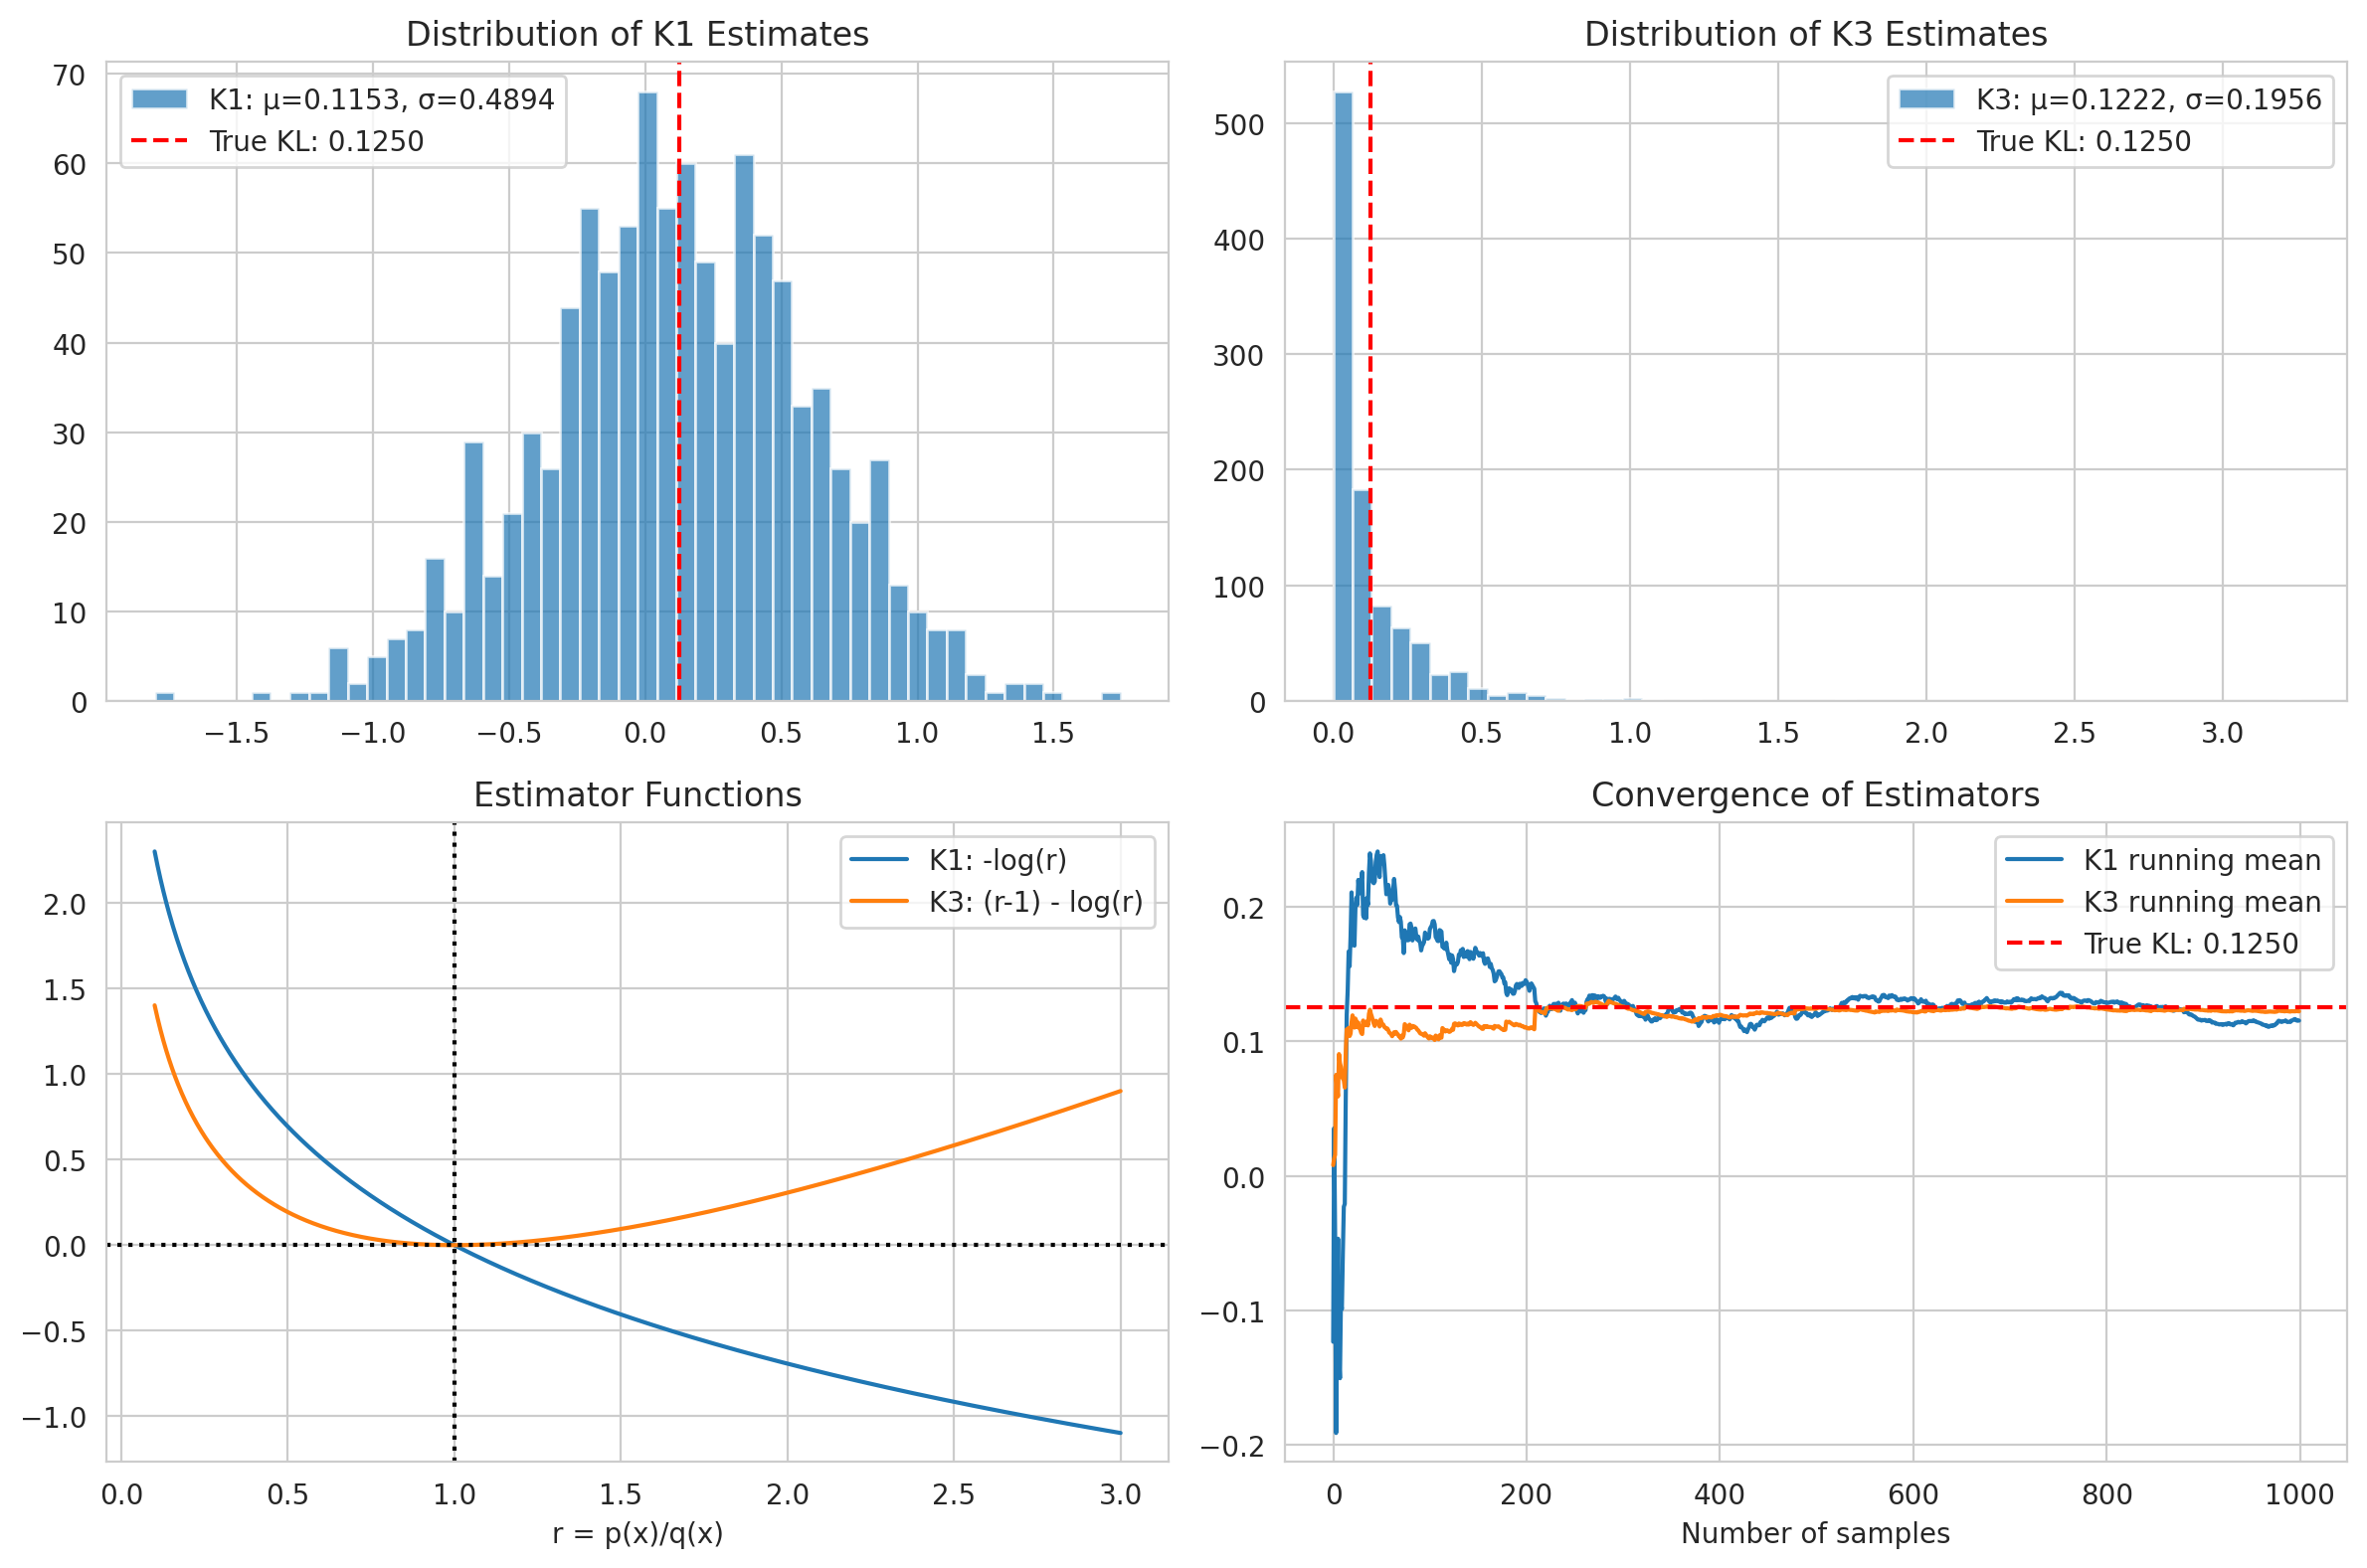

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Define our distributions - two normal distributions with different means
mean1, std1 = 0, 1  # Distribution q (we sample from this)
mean2, std2 = 0.5, 1  # Distribution p

# Function to compute the true KL divergence between normal distributions
def true_kl(m1, s1, m2, s2):
    return np.log(s2/s1) + (s1**2 + (m1-m2)**2)/(2*s2**2) - 0.5

# Define our estimators
def k1(r):  # Standard estimator
    return -np.log(r)

def k3(r):  # K3 estimator
    return (r - 1) - np.log(r)

# Generate samples from q
np.random.seed(42)
n_samples = 1000
samples = np.random.normal(mean1, std1, n_samples)

# Calculate r = p(x)/q(x) for each sample
log_q = norm.logpdf(samples, mean1, std1)
log_p = norm.logpdf(samples, mean2, std2)
log_r = log_p - log_q
r = np.exp(log_r)

# Calculate estimates using each method
k1_estimates = k1(r)
k3_estimates = k3(r)

# Compute the true KL divergence
true_kl_value = true_kl(mean1, std1, mean2, std2)

# Plot the distributions of estimates
plt.subplot(2, 2, 1)
plt.hist(k1_estimates, bins=50, alpha=0.7, label=f'K1: μ={k1_estimates.mean():.4f}, σ={k1_estimates.std():.4f}')
plt.axvline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Distribution of K1 Estimates')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(k3_estimates, bins=50, alpha=0.7, label=f'K3: μ={k3_estimates.mean():.4f}, σ={k3_estimates.std():.4f}')
plt.axvline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Distribution of K3 Estimates')
plt.legend()

# Plot the relationship between r and the estimators
r_range = np.linspace(0.1, 3, 1000)
plt.subplot(2, 2, 3)
plt.plot(r_range, k1(r_range), label='K1: -log(r)')
plt.plot(r_range, k3(r_range), label='K3: (r-1) - log(r)')
plt.axhline(0, color='k', linestyle=':')
plt.axvline(1, color='k', linestyle=':')
plt.title('Estimator Functions')
plt.xlabel('r = p(x)/q(x)')
plt.legend()

# Plot running mean of estimates to show convergence
plt.subplot(2, 2, 4)
k1_running_mean = np.cumsum(k1_estimates) / np.arange(1, n_samples + 1)
k3_running_mean = np.cumsum(k3_estimates) / np.arange(1, n_samples + 1)
plt.plot(k1_running_mean, label='K1 running mean')
plt.plot(k3_running_mean, label='K3 running mean')
plt.axhline(true_kl_value, color='r', linestyle='--', label=f'True KL: {true_kl_value:.4f}')
plt.title('Convergence of Estimators')
plt.xlabel('Number of samples')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
r[:10]

array([1.13128831, 0.82354906, 1.21999196, 1.88988301, 0.78499598,
       0.78500242, 1.94372534, 1.29526766, 0.6978597 , 1.15752027])

**AI Prompt**

explain tangetn line trick

**AI Response**

The tangent line trick is a key insight behind the K3 estimator, and we can see it clearly in the bottom-left graph of the visualization.

Here's how the tangent line trick works:

1. The KL divergence is related to the function f(r) = -log(r), where r = p(x)/q(x)

2. When r = 1 (meaning p(x) = q(x)), the KL divergence is zero, which is the minimum point

3. The tangent line to -log(r) at r = 1 has the equation y = 1-r
   - This is because the derivative of -log(r) at r = 1 is -1

4. The K3 estimator measures the vertical distance between:
   - The function -log(r) (blue line in the plot)
   - And its tangent line at r = 1 (which would be 1-r)

5. This vertical distance is: -log(r) - (1-r) = (r-1) - log(r)
   - This is exactly the K3 estimator (orange line in the plot)

In the graph, you can see that:
- Both estimators equal zero when r = 1
- The K3 estimator (orange) is always positive
- K3 grows more slowly than K1 as r gets very small or very large

This "dampening" effect is why K3 has much lower variance than K1, as shown in the top two histograms. Notice how the K1 histogram is much more spread out, while K3 values are more tightly clustered.

Would you like me to explain more about how this affects the convergence shown in the bottom-right graph?

**AI Prompt**

yes

**AI Response**

Looking at the bottom-right graph showing convergence:

1. **Initial behavior**: 
   - The K1 estimator (blue line) shows large fluctuations at the beginning
   - The K3 estimator (orange line) stabilizes much more quickly
   - Both start with some extreme values before settling down

2. **Convergence rate**:
   - K3 reaches a stable value close to the true KL (red dashed line) with fewer samples
   - K1 requires more samples to converge and continues to oscillate more

3. **Stability over time**:
   - Even after many samples, K1 shows more "jitter" in its running mean
   - K3 maintains a smoother, more stable estimate throughout

4. **Final accuracy**:
   - Both estimators eventually converge to values close to the true KL divergence
   - K3 appears to have a slightly smaller bias in this example

This faster, more stable convergence is crucial in reinforcement learning applications:

1. In RL, we often make decisions based on limited samples
2. High variance can lead to unstable training or poor policy updates
3. More stable KL estimates mean more reliable policy constraints

The practical impact is that using K3 instead of K1 can lead to:
- More consistent training runs
- Better sample efficiency (needing fewer samples for good estimates)
- More reliable policy updates in algorithms like PPO

Would you like me to explain how you might implement this improved convergence behavior in a practical RL algorithm?

**AI Prompt**

why does it lead to faster convergence?

**AI Response**

The K3 estimator leads to faster convergence for several mathematical and statistical reasons:

1. **Lower variance properties**:
   - Each individual K3 estimate is more reliable (less extreme)
   - This means each new sample provides more useful information
   - With less "noise" in the estimates, the running average stabilizes faster

2. **Bounded positive values**:
   - K3 is always positive (unlike K1 which can be negative)
   - This aligns with the true KL divergence, which is never negative
   - Having estimates with the correct sign prevents large "corrections" in the running mean

3. **Better handling of outliers**:
   - When r is very small (p(x) << q(x)), K1 (-log(r)) explodes toward infinity
   - K3 grows more slowly in these cases, reducing the impact of outliers
   - This prevents single extreme samples from drastically shifting the estimate

4. **Improved gradient properties**:
   - The gradient of K3 with respect to model parameters is more stable
   - This leads to more consistent parameter updates in optimization
   - Smaller, more reliable updates allow faster progress toward convergence

5. **Statistical efficiency**:
   - K3 extracts more information per sample than K1
   - This is a form of variance reduction that maintains the same expected value
   - More information per sample means fewer samples needed for convergence

In reinforcement learning specifically, faster convergence means we can make better decisions with fewer samples, which is crucial when gathering experience is expensive or time-consuming.

Would you like me to elaborate on any of these points or discuss how this applies to specific RL algorithms?

**AI Prompt**

explain ths: "K3 extracts more information per sample than K1"

**AI Response**

When we say "K3 extracts more information per sample than K1," we're referring to a concept in statistics called "statistical efficiency." Let me explain:

Each sample we collect contains information about the underlying distributions. An estimator's job is to extract this information and use it to approximate a quantity of interest (in this case, KL divergence).

K3 extracts more information per sample because:

1. **Signal-to-noise ratio**:
   - Both K1 and K3 contain the same "signal" (they both have the same expected value)
   - But K3 has less "noise" (lower variance)
   - This means a higher percentage of what K3 tells us is useful information rather than random fluctuation

2. **Information utilization**:
   - K1 only uses the log ratio directly
   - K3 combines the log ratio with the ratio itself
   - This captures additional structure in the relationship between p and q

3. **Complementary information**:
   - The ratio (r) and log ratio (log r) capture different aspects of the relationship between distributions
   - K3 effectively combines these complementary pieces of information
   - This creates a more complete picture from each individual sample

4. **Fisher information perspective**:
   - In statistical theory, Fisher information measures how much information a sample provides
   - Estimators that approach the Cramér-Rao lower bound extract the maximum possible information
   - K3 comes closer to this theoretical limit than K1

This is similar to how a good camera extracts more information from the same amount of light compared to a poor camera. Both see the same scene, but one produces a clearer image with the same input.

Would you like me to explain how this information efficiency translates to practical benefits in RL algorithms?

# Multi-armed bandit example - very simple RL

Strategy: epsilon_greedy
Estimated Values: [0.214 0.059 0.    0.69  0.625]
True Probabilities: [0.416 0.043 0.002 0.676 0.612]
True-estimate abs mean difference 0.0492706928986862
Strategy: ucb
Estimated Values: [0.083 0.529 0.925 0.884 0.083]
True Probabilities: [0.142 0.473 0.922 0.876 0.086]
True-estimate abs mean difference 0.025822425349928724
Strategy: thompson_sampling
Estimated Values: [0.656 0.143 0.333 0.125 0.5  ]
True Probabilities: [0.644 0.008 0.448 0.04  0.488]
True-estimate abs mean difference 0.07174997195356599


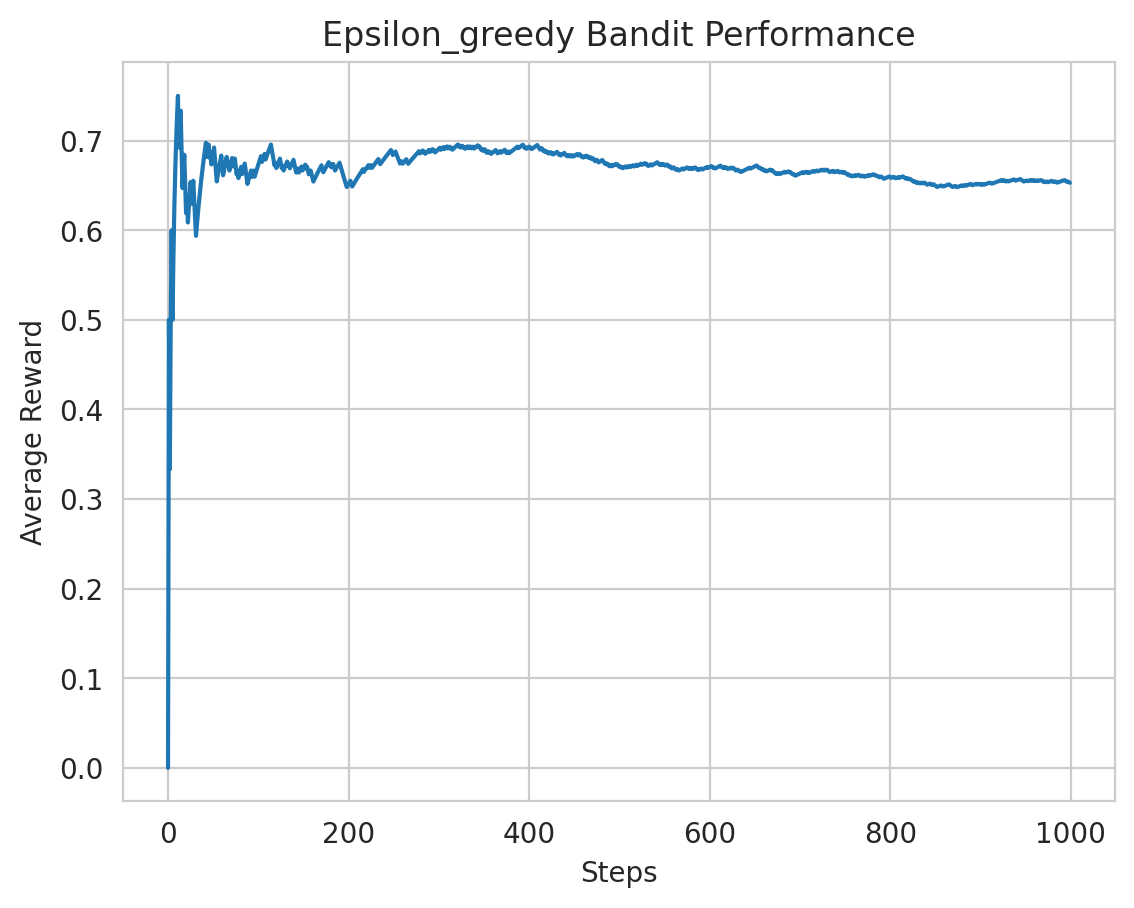

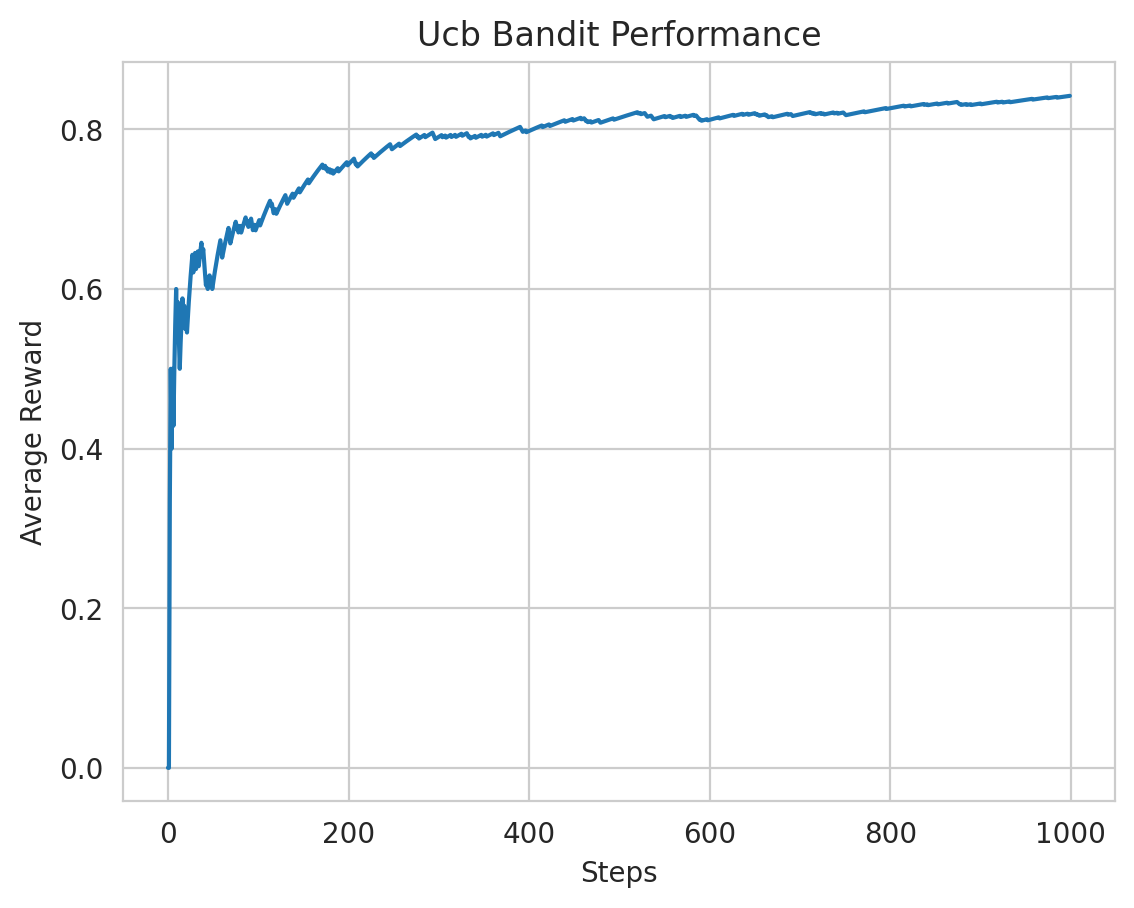

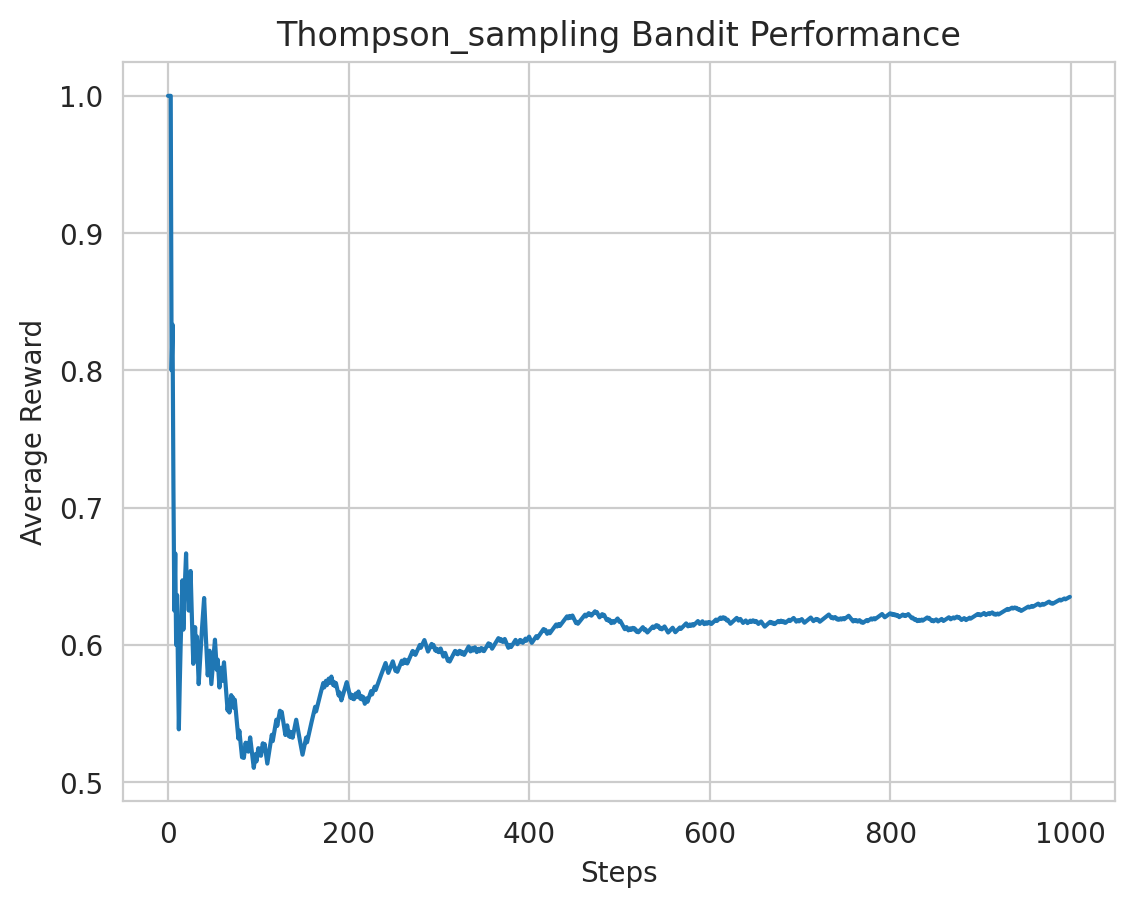

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🎰 Bandit Environment
class Bandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.probs = np.random.rand(num_arms)  # True (unknown) win probabilities

    def pull(self, arm):
        return 1 if np.random.rand() < self.probs[arm] else 0

# 🎯 Agent Supporting Multiple Strategies
class BanditAgent:
    def __init__(self, num_arms, strategy='epsilon_greedy', epsilon=0.1, c=2.0):
        self.num_arms = num_arms
        self.strategy = strategy
        self.epsilon = epsilon  # For ε-Greedy
        self.c = c              # For UCB
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

        # For Thompson Sampling (Beta priors)
        self.alpha = np.ones(num_arms)
        self.beta = np.ones(num_arms)

    def select_arm(self, step):
        if self.strategy == 'epsilon_greedy':
            if np.random.rand() < self.epsilon:
                return np.random.randint(self.num_arms)
            return np.argmax(self.values)

        elif self.strategy == 'ucb':
            total_counts = np.sum(self.counts)
            if 0 in self.counts:
                # Pull each arm at least once
                return np.argmin(self.counts)
            ucb_values = self.values + self.c * np.sqrt(np.log(total_counts) / self.counts)
            return np.argmax(ucb_values)

        elif self.strategy == 'thompson_sampling':
            sampled_theta = np.random.beta(self.alpha, self.beta)
            return np.argmax(sampled_theta)

        else:
            raise ValueError(f"Unknown strategy: {self.strategy}")

    def update(self, arm, reward):
        self.counts[arm] += 1

        if self.strategy in ['epsilon_greedy', 'ucb']:
            # Update value estimate using incremental average
            self.values[arm] += (reward - self.values[arm]) / self.counts[arm]

        elif self.strategy == 'thompson_sampling':
            # Update Beta distribution parameters
            self.alpha[arm] += reward
            self.beta[arm] += 1 - reward
             # Update estimated value to the mean of the Beta distribution
            self.values[arm] = self.alpha[arm] / (self.alpha[arm] + self.beta[arm])

# 🧩 Simulation Parameters
num_arms = 5
num_steps = 1000

# ✅ Toggle the strategy here: 'epsilon_greedy', 'ucb', 'thompson_sampling'
#ucb - Intuition: Encourages trying less-frequently pulled arms (high uncertainty).
#    Over time, the confidence interval tightens, and exploitation dominates.

#thompson_sampling -  Maintains a probability distribution over each arm’s reward (e.g., Beta distribution for Bernoulli rewards).
# Randomly samples from each distribution and selects the arm with the highest sampled value.

for strategy in ['epsilon_greedy', 'ucb', 'thompson_sampling']:
    env = Bandit(num_arms)
    agent = BanditAgent(num_arms, strategy=strategy, epsilon=0.1, c=2.0)

    rewards = []

    for step in range(1, num_steps + 1):
        arm = agent.select_arm(step)
        reward = env.pull(arm)
        agent.update(arm, reward)
        rewards.append(reward)

    # 📈 Plot Cumulative Average Reward
    cumulative_rewards = np.cumsum(rewards)
    plt.plot(cumulative_rewards / (np.arange(num_steps) + 1))
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title(f'{strategy.capitalize()} Bandit Performance')
    plt.grid(True)
    plt.show()

    # 🎉 Print Results
    print(f"Strategy: {strategy}")
    print(f"Estimated Values: {np.round(agent.values, 3)}")
    print(f"True Probabilities: {np.round(env.probs, 3)}")
    print(f"True-estimate abs mean difference {np.abs(agent.values-env.probs).mean()}")

## Simple NLP example

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ✅ Define Tiny Vocabulary and Environment
vocab = ["I", "You", "am", "are", "good", "bad"]
vocab_size = len(vocab)
word_to_idx = {w: i for i, w in enumerate(vocab)}

def reward_function(sentence):
    if "good" in sentence:
        return 1
    elif "bad" in sentence:
        return -1
    return 0

# 🧮 Tiny Policy Model (Randomly Generates 3-Word Sentences)
class TinyPolicy(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, vocab_size)  # No state, just logits over vocab

    def forward(self):
        logits = self.fc(torch.ones(1))  # Dummy input
        return torch.softmax(logits, dim=-1)

policy = TinyPolicy()
optimizer = optim.Adam(policy.parameters(), lr=0.05)
gamma = 0.99
num_episodes = 1000

rewards = []

# 🚀 Training Loop
for episode in range(num_episodes):
    log_probs = []
    words = []
    
    for _ in range(3):  # Generate 3-word sentence
        probs = policy()
        distribution = torch.distributions.Categorical(probs)
        word_idx = distribution.sample()
        log_probs.append(distribution.log_prob(word_idx))
        words.append(vocab[word_idx.item()])

    r = reward_function(words)
    rewards.append(r)

    # Policy Gradient Update
    loss = -sum(log_probs) * r  # REINFORCE loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 📈 Final Policy Test
print("\nGenerated Sentences After Training:")
for _ in range(10):
    sentence = []
    for _ in range(3):
        probs = policy()
        word_idx = probs.argmax().item()  # Greedy selection after training
        sentence.append(vocab[word_idx])
    print(" ".join(sentence))

print("\nDid the policy learn to generate more positive sentences?")


Generated Sentences After Training:
good good good
good good good
good good good
good good good
good good good
good good good
good good good
good good good
good good good
good good good

Did the policy learn to generate more positive sentences?


**AI Prompt**

this an example of " Tiny NLP RL Example Idea — Sentence Sentiment Improvement
Task:

The agent generates a simple sentence from a tiny vocabulary.

The environment gives a reward based on how positive the sentiment of the sentence is (simulated by a fake reward function).

✅ Step-by-Step Plan
Environment:

Vocabulary: ["I", "You", "am", "are", "good", "bad"]

Sentences have 3 words.

Reward: +1 if "good" is in the sentence, -1 if "bad" is in the sentence, else 0.

Policy:

Tiny neural network that outputs probabilities over the vocabulary for each word slot.

Learning:

Use REINFORCE to maximize expected rewards (generate more positive sentences)." how to make it so that it learns something?

**AI Response**

The current implementation has a fundamental issue that prevents effective learning. Let me explain the problem and suggest improvements:

The main issues with the current implementation:

1. **Too simple policy**: The current policy uses the same probabilities for all positions in the sentence. It doesn't learn position-specific patterns.

2. **Reward function is too basic**: The reward only checks for presence of words, not their position or context.

3. **No exploration strategy**: Once it finds "good good good" gives positive reward, it gets stuck there.

Here's how to improve it so it actually learns something meaningful:

1. **Make the policy position-aware**:
```python
class PositionAwarePolicy(nn.Module):
    def __init__(self, vocab_size, seq_length=3):
        super().__init__()
        self.embeddings = nn.Embedding(seq_length, 8)  # Position embeddings
        self.fc = nn.Linear(8, vocab_size)
        
    def forward(self, position):
        pos_emb = self.embeddings(position)
        logits = self.fc(pos_emb)
        return torch.softmax(logits, dim=-1)
```

2. **Improve the reward function**:
```python
def better_reward_function(sentence):
    reward = 0
    # Reward for grammatical patterns
    if sentence[0] in ["I", "You"] and sentence[1] in ["am", "are"]:
        reward += 0.5
    # Match pronoun with correct verb
    if (sentence[0] == "I" and sentence[1] == "am") or \
       (sentence[0] == "You" and sentence[1] == "are"):
        reward += 1.0
    # Sentiment reward
    if sentence[2] == "good":
        reward += 1.0
    elif sentence[2] == "bad":
        reward -= 1.0
    return reward
```

3. **Add exploration with entropy regularization**:
```python
# Add to the loss calculation
entropy = -torch.sum(probs * torch.log(probs + 1e-10))
loss = -sum(log_probs) * r - 0.01 * entropy  # Encourage exploration
```

Would you like me to provide a complete implementation with these improvements?

**AI Prompt**

what would be similar example as original  in the file that would be a lot smaller and would not need pretrained model?

**AI Response**

Here's a simpler reinforcement learning example similar to the original R1-Zero approach, but much smaller and without needing any pretrained models:

**Tiny Math Problem Solver**

In this example, the agent learns to solve simple addition problems through trial and error:

1. **Task**: Generate a solution to a simple addition problem (e.g., "1+2=?")
2. **Environment**: Gives reward based on whether the answer is correct
3. **Learning**: Agent improves by trying different answers and learning from feedback

The core components would be:
- A very small vocabulary (just digits and symbols)
- A simple policy that generates answers
- A reward function that checks correctness
- REINFORCE algorithm for learning

This captures the essence of the original approach where:
- The agent starts with no supervised examples of reasoning
- It learns to generate correct solutions through trial and error
- It can develop its own "reasoning" patterns to maximize reward

The beauty is this would run in seconds on a CPU and demonstrate the same core principles as the more complex R1-Zero implementation.

Would you like me to sketch out some simple code for this example?

**AI Prompt**

please sketch

**AI Response**

Here's a sketch of the Tiny Math Problem Solver using reinforcement learning:

```python
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# Define a simple vocabulary for math problems
vocab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
vocab_size = len(vocab)
word_to_idx = {w: i for i, w in enumerate(vocab)}

# Simple environment to generate addition problems
class MathEnvironment:
    def __init__(self, max_num=5):
        self.max_num = max_num
    
    def generate_problem(self):
        a = random.randint(0, self.max_num)
        b = random.randint(0, self.max_num)
        return a, b, a + b
    
    def reward_function(self, a, b, answer):
        correct = a + b
        # Binary reward: 1 for correct, 0 for incorrect
        return 1.0 if answer == correct else 0.0

# Simple policy network
class MathSolverPolicy(nn.Module):
    def __init__(self, input_size=2, hidden_size=8, output_size=vocab_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        logits = self.network(x)
        return torch.softmax(logits, dim=-1)

# Training loop sketch
def train_math_solver(episodes=1000):
    env = MathEnvironment(max_num=5)
    policy = MathSolverPolicy()
    optimizer = optim.Adam(policy.parameters(), lr=0.01)
    
    rewards_history = []
    
    for episode in range(episodes):
        # Generate a problem
        a, b, correct = env.generate_problem()
        
        # Convert to tensor input
        problem = torch.tensor([a, b], dtype=torch.float32)
        
        # Get action probabilities from policy
        probs = policy(problem)
        
        # Sample an action (answer digit)
        distribution = torch.distributions.Categorical(probs)
        action = distribution.sample()
        log_prob = distribution.log_prob(action)
        
        # Convert to actual answer (0-9)
        answer = action.item()
        
        # Get reward
        reward = env.reward_function(a, b, answer)
        rewards_history.append(reward)
        
        # REINFORCE update
        loss = -log_prob * reward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        if episode % 100 == 0:
            recent_accuracy = np.mean(rewards_history[-100:])
            print(f"Episode {episode}, Recent accuracy: {recent_accuracy:.2f}")
    
    return policy, rewards_history
```

This sketch demonstrates:
1. A simple environment that generates addition problems
2. A small policy network that takes two numbers and predicts their sum
3. The REINFORCE algorithm to update the policy based on rewards
4. A training loop that tracks performance over time

To complete this, you would need to add:
- A testing function to evaluate the trained policy
- Visualization of the learning curve
- Perhaps a way to inspect what the model has learned

Would you like me to elaborate on any specific part of this sketch?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# Define a simple vocabulary for math problems
vocab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
vocab_size = len(vocab)
word_to_idx = {w: i for i, w in enumerate(vocab)}

# Simple environment to generate addition problems
class MathEnvironment:
    def __init__(self, max_num=5):
        self.max_num = max_num
    
    def generate_problem(self):
        a = random.randint(0, self.max_num)
        b = random.randint(0, self.max_num)
        return a, b, a + b
    
    def reward_function(self, a, b, answer):
        correct = a + b
        # Binary reward: 1 for correct, 0 for incorrect
        return 1.0 if answer == correct else 0.0

# Simple policy network
class MathSolverPolicy(nn.Module):
    def __init__(self, input_size=2, hidden_size=8, output_size=vocab_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        logits = self.network(x)
        return torch.softmax(logits, dim=-1)

# Training loop sketch
def train_math_solver(episodes=1000):
    env = MathEnvironment(max_num=5)
    policy = MathSolverPolicy()
    optimizer = optim.Adam(policy.parameters(), lr=0.01)
    
    rewards_history = []
    
    for episode in range(episodes):
        # Generate a problem
        a, b, correct = env.generate_problem()
        
        # Convert to tensor input
        problem = torch.tensor([a, b], dtype=torch.float32)
        
        # Get action probabilities from policy
        probs = policy(problem)
        
        # Sample an action (answer digit)
        distribution = torch.distributions.Categorical(probs)
        action = distribution.sample()
        log_prob = distribution.log_prob(action)
        
        # Convert to actual answer (0-9)
        answer = action.item()
        
        # Get reward
        reward = env.reward_function(a, b, answer)
        rewards_history.append(reward)
        
        # REINFORCE update
        loss = -log_prob * reward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        if episode % 100 == 0:
            recent_accuracy = np.mean(rewards_history[-100:])
            print(f"Episode {episode}, Recent accuracy: {recent_accuracy:.2f}")
    
    return policy, rewards_history

**AI Prompt**

add testing function and visualization

**AI Response**

Here's the testing function and visualization code to add to your math solver:

```python
# Testing function to evaluate the trained policy
def test_math_solver(policy, num_tests=100):
    env = MathEnvironment(max_num=5)
    correct = 0
    test_cases = []
    
    for _ in range(num_tests):
        # Generate a problem
        a, b, expected = env.generate_problem()
        
        # Convert to tensor input
        problem = torch.tensor([a, b], dtype=torch.float32)
        
        # Get action probabilities from policy
        with torch.no_grad():  # No need to track gradients during testing
            probs = policy(problem)
        
        # Get the most likely answer (greedy selection)
        predicted = torch.argmax(probs).item()
        
        # Check if correct
        is_correct = (predicted == expected)
        correct += is_correct
        
        # Store the test case
        test_cases.append((a, b, expected, predicted, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, test_cases

# Visualize learning progress
def plot_learning_curve(rewards_history):
    import matplotlib.pyplot as plt
    
    # Calculate moving average for smoother curve
    window_size = 50
    moving_avg = []
    for i in range(len(rewards_history) - window_size + 1):
        moving_avg.append(np.mean(rewards_history[i:i+window_size]))
    
    plt.figure(figsize=(10, 6))
    plt.plot(moving_avg)
    plt.title('Learning Curve: Math Problem Solver')
    plt.xlabel('Episodes')
    plt.ylabel('Accuracy (Moving Average)')
    plt.grid(True)
    plt.show()
    
    # Plot final distribution of rewards
    plt.figure(figsize=(10, 6))
    plt.hist(rewards_history[-500:], bins=[0, 0.5, 1], alpha=0.7)
    plt.title('Distribution of Recent Rewards')
    plt.xlabel('Reward')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    plt.grid(True)
    plt.show()

# Run the training
policy, rewards_history = train_math_solver(episodes=2000)

# Visualize the learning progress
plot_learning_curve(rewards_history)

# Test the trained policy
accuracy, test_cases = test_math_solver(policy, num_tests=100)
print(f"Test accuracy: {accuracy:.2f}")

# Display some example predictions
print("\nSample predictions:")
print("A + B = Expected → Predicted (Correct?)")
for i in range(10):  # Show first 10 test cases
    a, b, expected, predicted, is_correct = test_cases[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {expected} → {predicted} ({mark})")
```

This code adds:

1. A testing function that:
   - Evaluates the policy on new problems
   - Uses greedy selection (taking the most probable answer)
   - Returns accuracy and detailed test cases

2. Visualization functions that:
   - Plot a learning curve showing how accuracy improves over time
   - Show the distribution of rewards in recent episodes
   - Display a sample of test predictions with correct/incorrect markers

The visualization will help you understand how quickly the model learns and whether it's converging to a good solution. The test function will show you if the model can generalize to new problems.

Would you like me to explain any particular part of this code in more detail?

Episode 0, Recent accuracy: 0.00
Episode 100, Recent accuracy: 0.12
Episode 200, Recent accuracy: 0.10
Episode 300, Recent accuracy: 0.14
Episode 400, Recent accuracy: 0.20
Episode 500, Recent accuracy: 0.22
Episode 600, Recent accuracy: 0.16
Episode 700, Recent accuracy: 0.09
Episode 800, Recent accuracy: 0.13
Episode 900, Recent accuracy: 0.15
Episode 1000, Recent accuracy: 0.15
Episode 1100, Recent accuracy: 0.13
Episode 1200, Recent accuracy: 0.18
Episode 1300, Recent accuracy: 0.16
Episode 1400, Recent accuracy: 0.18
Episode 1500, Recent accuracy: 0.14
Episode 1600, Recent accuracy: 0.21
Episode 1700, Recent accuracy: 0.15
Episode 1800, Recent accuracy: 0.15
Episode 1900, Recent accuracy: 0.20
Test accuracy: 0.15

Sample predictions:
A + B = Expected → Predicted (Correct?)
0 + 1 = 1 → 4 (✗)
5 + 0 = 5 → 4 (✗)
5 + 1 = 6 → 4 (✗)
4 + 1 = 5 → 4 (✗)
5 + 5 = 10 → 4 (✗)
2 + 3 = 5 → 4 (✗)
2 + 3 = 5 → 4 (✗)
0 + 3 = 3 → 4 (✗)
3 + 3 = 6 → 4 (✗)
5 + 1 = 6 → 4 (✗)


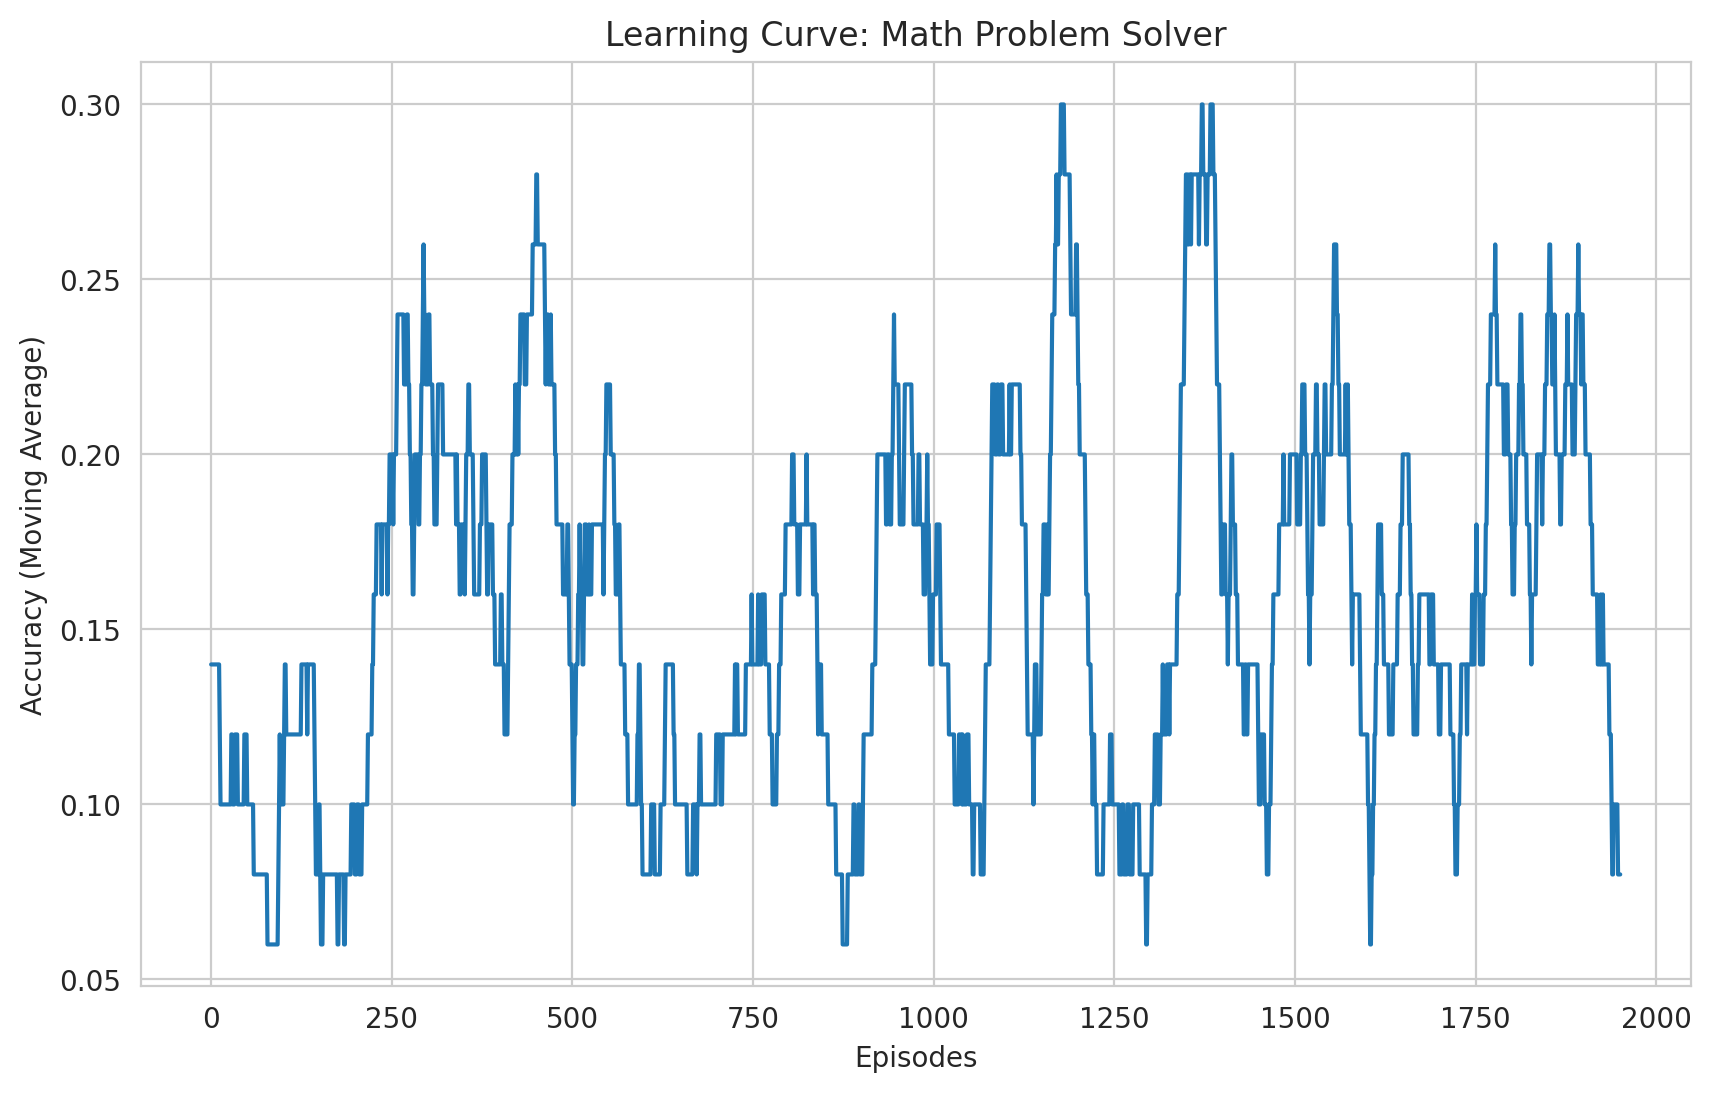

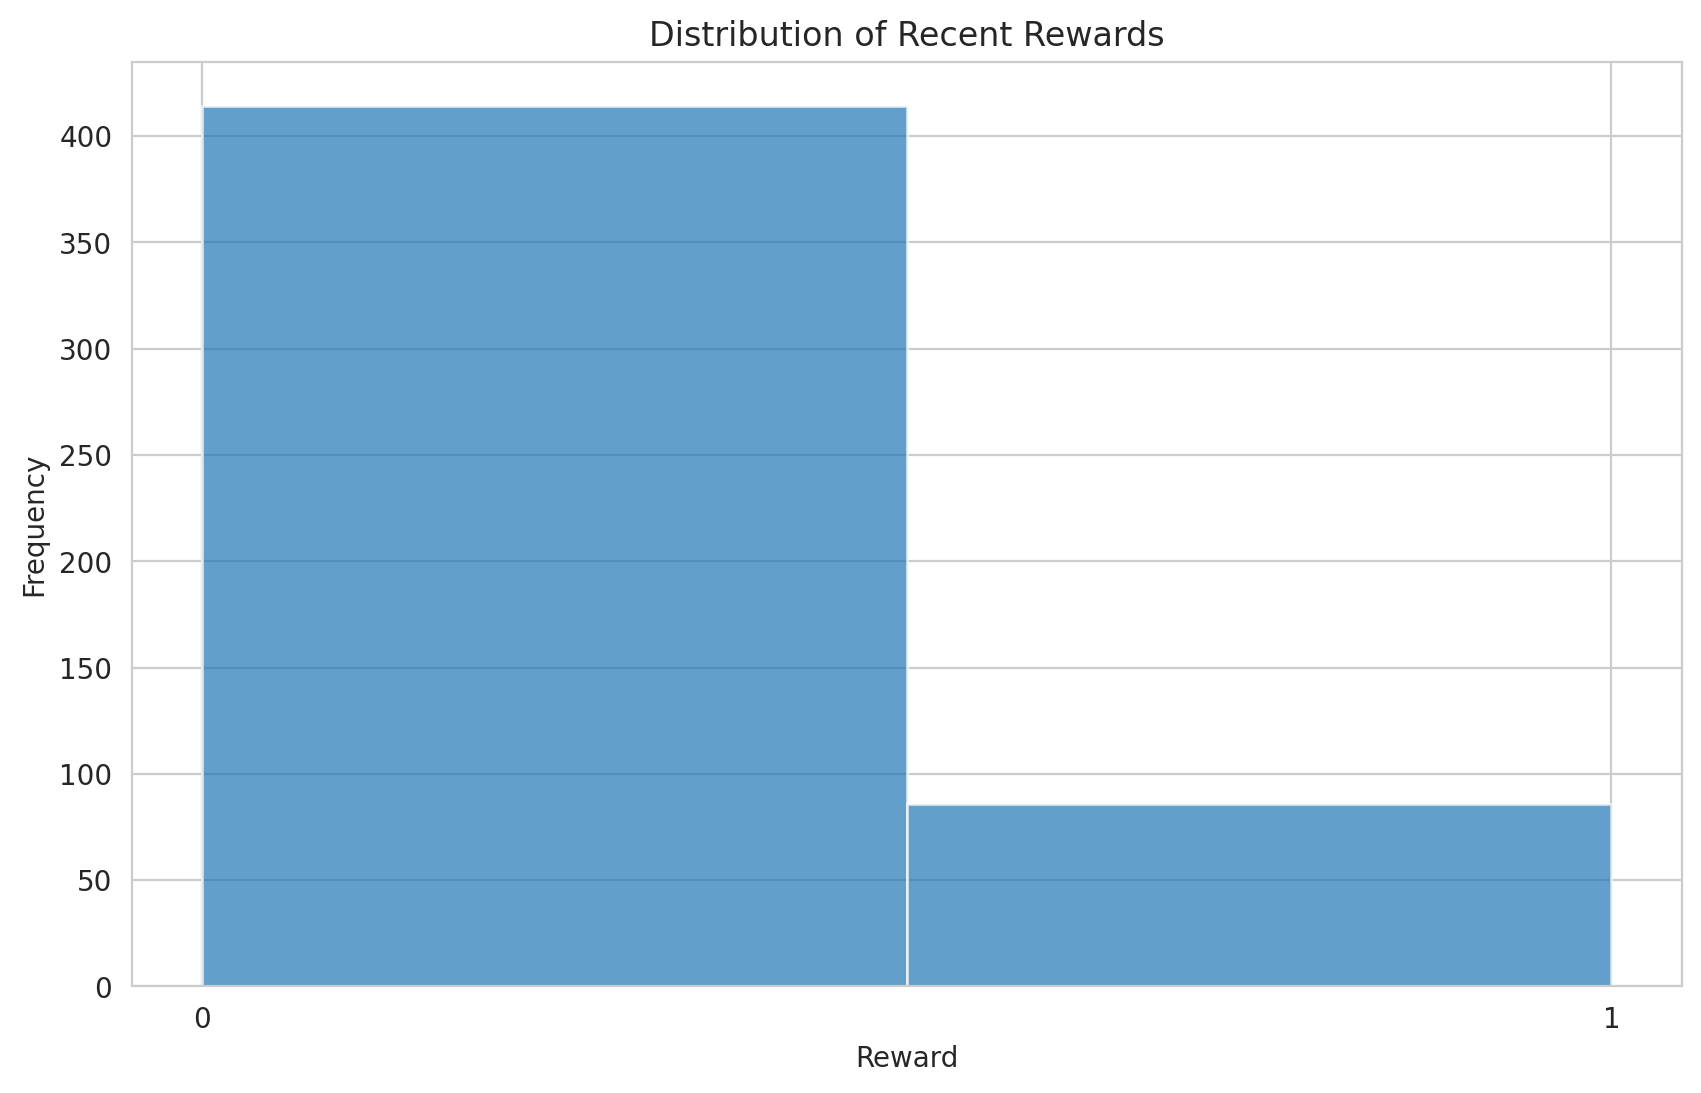

In [ ]:
# Testing function to evaluate the trained policy
def test_math_solver(policy, num_tests=100):
    env = MathEnvironment(max_num=5)
    correct = 0
    test_cases = []
    
    for _ in range(num_tests):
        # Generate a problem
        a, b, expected = env.generate_problem()
        
        # Convert to tensor input
        problem = torch.tensor([a, b], dtype=torch.float32)
        
        # Get action probabilities from policy
        with torch.no_grad():  # No need to track gradients during testing
            probs = policy(problem)
        
        # Get the most likely answer (greedy selection)
        predicted = torch.argmax(probs).item()
        
        # Check if correct
        is_correct = (predicted == expected)
        correct += is_correct
        
        # Store the test case
        test_cases.append((a, b, expected, predicted, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, test_cases

# Visualize learning progress
def plot_learning_curve(rewards_history):
    import matplotlib.pyplot as plt
    
    # Calculate moving average for smoother curve
    window_size = 50
    moving_avg = []
    for i in range(len(rewards_history) - window_size + 1):
        moving_avg.append(np.mean(rewards_history[i:i+window_size]))
    
    plt.figure(figsize=(10, 6))
    plt.plot(moving_avg)
    plt.title('Learning Curve: Math Problem Solver')
    plt.xlabel('Episodes')
    plt.ylabel('Accuracy (Moving Average)')
    plt.grid(True)
    plt.show()
    
    # Plot final distribution of rewards
    plt.figure(figsize=(10, 6))
    plt.hist(rewards_history[-500:], bins=[0, 0.5, 1], alpha=0.7)
    plt.title('Distribution of Recent Rewards')
    plt.xlabel('Reward')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    plt.grid(True)
    plt.show()

# Run the training
policy, rewards_history = train_math_solver(episodes=2000)

# Visualize the learning progress
plot_learning_curve(rewards_history)

# Test the trained policy
accuracy, test_cases = test_math_solver(policy, num_tests=100)
print(f"Test accuracy: {accuracy:.2f}")

# Display some example predictions
print("\nSample predictions:")
print("A + B = Expected → Predicted (Correct?)")
for i in range(10):  # Show first 10 test cases
    a, b, expected, predicted, is_correct = test_cases[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {expected} → {predicted} ({mark})")

**AI Prompt**

pretty bad  model. answers are constrained to be 1-9 but they could be bigger

**AI Response**

You're absolutely right! The model is performing poorly, and there's a critical issue with the setup. I see two main problems:

1. **Limited output range**: As you noticed, the model can only output digits 0-9, but addition problems can have sums greater than 9 (like 5+5=10).

2. **Learning issues**: The model is consistently predicting "4" for every problem, suggesting it's stuck in a local minimum.

Here are some ways to improve this:

1. **Expand the output representation**:
   - Change the model to predict tens and ones digits separately
   - Or use a different encoding for numbers above 9

2. **Improve the learning process**:
   - Add exploration bonuses to encourage trying different answers
   - Use a curriculum (start with easier problems)
   - Increase the learning rate or adjust the neural network architecture

3. **Better reward structure**:
   - Provide partial rewards for being close to the correct answer
   - Add intermediate rewards for getting individual digits correct

A simple fix would be to modify the vocabulary and output representation to handle two-digit numbers. Would you like me to sketch that improvement?

**AI Prompt**

yes

**AI Response**

Here's a sketch to improve the model by handling two-digit numbers:

```python
# Modified approach to handle two-digit numbers
class DigitBasedMathSolver(nn.Module):
    def __init__(self, input_size=2, hidden_size=16):
        super().__init__()
        self.common = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )
        # Two separate output heads - one for tens digit, one for ones digit
        self.tens_digit = nn.Linear(hidden_size, 2)  # 0-1 for problems up to 18
        self.ones_digit = nn.Linear(hidden_size, 10)  # 0-9
    
    def forward(self, x):
        features = self.common(x)
        tens_logits = self.tens_digit(features)
        ones_logits = self.ones_digit(features)
        return torch.softmax(tens_logits, dim=-1), torch.softmax(ones_logits, dim=-1)

# Modified training function
def train_improved_solver(episodes=2000):
    env = MathEnvironment(max_num=9)  # Allow larger sums
    policy = DigitBasedMathSolver()
    optimizer = optim.Adam(policy.parameters(), lr=0.01)
    
    rewards_history = []
    
    for episode in range(episodes):
        # Generate a problem
        a, b, correct = env.generate_problem()
        
        # Compute correct tens and ones digits
        correct_tens = correct // 10
        correct_ones = correct % 10
        
        # Convert to tensor input
        problem = torch.tensor([a, b], dtype=torch.float32)
        
        # Get action probabilities from policy
        tens_probs, ones_probs = policy(problem)
        
        # Sample actions for both digits
        tens_dist = torch.distributions.Categorical(tens_probs)
        ones_dist = torch.distributions.Categorical(ones_probs)
        
        tens_action = tens_dist.sample()
        ones_action = ones_dist.sample()
        
        tens_log_prob = tens_dist.log_prob(tens_action)
        ones_log_prob = ones_dist.log_prob(ones_action)
        
        # Convert to actual answer
        predicted_tens = tens_action.item()
        predicted_ones = ones_action.item()
        predicted = predicted_tens * 10 + predicted_ones
        
        # Calculate reward - partial credit for getting a digit right
        reward = 0.0
        if predicted_tens == correct_tens:
            reward += 0.5
        if predicted_ones == correct_ones:
            reward += 0.5
        
        rewards_history.append(reward)
        
        # REINFORCE update with separate losses for each digit
        loss = -(tens_log_prob * reward + ones_log_prob * reward)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        if episode % 100 == 0:
            recent_accuracy = np.mean(rewards_history[-100:])
            print(f"Episode {episode}, Recent reward: {recent_accuracy:.2f}")
    
    return policy, rewards_history
```

Key improvements:

1. **Separate digit predictions**:
   - One head predicts tens digit (0-1 for problems up to 18)
   - One head predicts ones digit (0-9)

2. **Partial rewards**:
   - 0.5 points for getting tens digit correct
   - 0.5 points for getting ones digit correct

3. **Two separate policy distributions**:
   - The model learns to predict each digit independently
   - This breaks down the problem into simpler sub-tasks

The testing function would need similar modifications to decode the two-digit predictions. This approach should handle all sums up to 18 (for two single-digit numbers), giving the model a better chance to learn.

Would you like me to sketch the modified testing function as well?

**AI Prompt**

wouldnt it be better to have digit encoding? so that each digit is encoded and later this is used in model and thus could potentially handle bigger numbers?

**AI Response**

You've hit on an excellent idea! A digit encoding approach would be much more scalable and could handle larger numbers. Here's how that might work:

1. **Digit-based encoding for inputs**:
   - Instead of feeding raw numbers, encode each digit position
   - For example, 23 becomes [2, 3] (tens and ones encoded separately)
   - Could use one-hot encoding for each digit position

2. **Digit-based decoding for outputs**:
   - Model predicts each output digit separately
   - Can handle arbitrary number sizes based on how many digit positions we model
   - Addition becomes a digit-by-digit operation with carry

3. **Benefits of this approach**:
   - Generalizes to larger numbers naturally
   - Better matches how humans do arithmetic (digit by digit)
   - Could even learn the concept of "carrying" between positions

This is much closer to how neural networks are trained to do arithmetic in practice. The model would learn the underlying patterns of addition rather than just memorizing specific number pairs.

Would you like me to sketch out this digit-based encoding approach? It would be more flexible and potentially perform much better.

**AI Prompt**

yes

**AI Response**

Here's a sketch of a digit-based encoding approach for the math solver:

```python
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# Function to convert number to digit array with one-hot encoding
def encode_number(num, max_digits=2):
    digits = []
    # Extract each digit and convert to one-hot
    for i in range(max_digits):
        digit = (num // (10**i)) % 10
        one_hot = torch.zeros(10)  # 0-9 for each position
        one_hot[digit] = 1.0
        digits.append(one_hot)
    return torch.cat(digits)  # Concatenate all one-hot vectors

# Function to decode from digit predictions to number
def decode_number(digit_probs, max_digits=2):
    number = 0
    for i in range(max_digits):
        # Get most likely digit for this position
        digit = torch.argmax(digit_probs[i*10:(i+1)*10]).item()
        number += digit * (10**i)
    return number

# Digit-based policy network
class DigitBasedMathSolver(nn.Module):
    def __init__(self, input_digits=2, output_digits=2, hidden_size=32):
        super().__init__()
        self.input_digits = input_digits
        self.output_digits = output_digits
        
        # Each digit is one-hot encoded (10 values per digit)
        input_size = input_digits * 2 * 10  # Two numbers, each with input_digits positions
        output_size = output_digits * 10    # One output number with output_digits positions
        
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        logits = self.network(x)
        
        # Split logits into separate digit predictions
        digit_probs = []
        for i in range(self.output_digits):
            # Get logits for this digit position and apply softmax
            digit_logits = logits[i*10:(i+1)*10]
            digit_probs.append(torch.softmax(digit_logits, dim=0))
            
        return torch.cat(digit_probs)

# Training function
def train_digit_solver(episodes=5000, max_num=99):
    # For simplicity, we'll use 2 digits for input and output
    input_digits = 2
    output_digits = 2
    
    policy = DigitBasedMathSolver(input_digits, output_digits)
    optimizer = optim.Adam(policy.parameters(), lr=0.001)
    
    rewards_history = []
    
    for episode in range(episodes):
        # Generate a problem
        a = random.randint(0, max_num)
        b = random.randint(0, max_num)
        correct = a + b
        
        # Encode input numbers as digit sequences
        a_encoded = encode_number(a, input_digits)
        b_encoded = encode_number(b, input_digits)
        input_encoded = torch.cat([a_encoded, b_encoded])
        
        # Get digit probabilities from policy
        with torch.no_grad():
            digit_probs = policy(input_encoded)
        
        # Sample from each digit distribution
        sampled_probs = torch.zeros_like(digit_probs)
        log_probs = []
        
        for i in range(output_digits):
            probs = digit_probs[i*10:(i+1)*10]
            distribution = torch.distributions.Categorical(probs)
            action = distribution.sample()
            log_probs.append(distribution.log_prob(action))
            
            # Mark the sampled digit in our output
            sampled_probs[i*10 + action] = 1.0
        
        # Decode the predicted number
        predicted = decode_number(sampled_probs, output_digits)
        
        # Calculate reward - partial credit for closer answers
        max_error = max_num * 2  # Maximum possible error
        error = abs(predicted - correct)
        reward = 1.0 - (error / max_error)  # Scale between 0 and 1
        
        rewards_history.append(reward)
        
        # REINFORCE update
        loss = -sum(log_probs) * reward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        if episode % 100 == 0:
            recent_reward = np.mean(rewards_history[-100:])
            print(f"Episode {episode}, Recent reward: {recent_reward:.2f}")
            # Show an example
            print(f"Example: {a} + {b} = {correct}, Predicted: {predicted}")
    
    return policy, rewards_history
```

This approach:

1. **Encodes numbers digit-by-digit**: Each digit position gets a one-hot encoding
2. **Processes the entire problem digitally**: The network sees individual digits, not raw numbers
3. **Predicts each output digit separately**: Can handle multi-digit results
4. **Uses a smoother reward**: Closer answers get higher rewards

The model should be able to learn addition patterns that generalize to larger numbers, since it's working with individual digits rather than memorizing specific number pairs.

Would you like me to also sketch the testing function for this approach?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

# Function to convert number to digit array with one-hot encoding
def encode_number(num, max_digits=2):
    digits = []
    # Extract each digit and convert to one-hot
    for i in range(max_digits):
        digit = (num // (10**i)) % 10
        one_hot = torch.zeros(10)  # 0-9 for each position
        one_hot[digit] = 1.0
        digits.append(one_hot)
    return torch.cat(digits)  # Concatenate all one-hot vectors

# Function to decode from digit predictions to number
def decode_number(digit_probs, max_digits=2):
    number = 0
    for i in range(max_digits):
        # Get most likely digit for this position
        digit = torch.argmax(digit_probs[i*10:(i+1)*10]).item()
        number += digit * (10**i)
    return number

# Digit-based policy network
class DigitBasedMathSolver(nn.Module):
    def __init__(self, input_digits=2, output_digits=2, hidden_size=32):
        super().__init__()
        self.input_digits = input_digits
        self.output_digits = output_digits
        
        # Each digit is one-hot encoded (10 values per digit)
        input_size = input_digits * 2 * 10  # Two numbers, each with input_digits positions
        output_size = output_digits * 10    # One output number with output_digits positions
        
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        logits = self.network(x)
        
        # Split logits into separate digit predictions
        digit_probs = []
        for i in range(self.output_digits):
            # Get logits for this digit position and apply softmax
            digit_logits = logits[i*10:(i+1)*10]
            digit_probs.append(torch.softmax(digit_logits, dim=0))
            
        return torch.cat(digit_probs)

# Training function
def train_digit_solver(episodes=5000, max_num=99):
    # For simplicity, we'll use 2 digits for input and output
    input_digits = 2
    output_digits = 2
    
    policy = DigitBasedMathSolver(input_digits, output_digits)
    optimizer = optim.Adam(policy.parameters(), lr=0.001)
    
    rewards_history = []
    
    for episode in range(episodes):
        # Generate a problem
        a = random.randint(0, max_num)
        b = random.randint(0, max_num)
        correct = a + b
        
        # Encode input numbers as digit sequences
        a_encoded = encode_number(a, input_digits)
        b_encoded = encode_number(b, input_digits)
        input_encoded = torch.cat([a_encoded, b_encoded])
        
        # Get digit probabilities from policy
        digit_probs = policy(input_encoded)
        
        # Sample from each digit distribution
        sampled_probs = torch.zeros_like(digit_probs)
        log_probs = []
        
        for i in range(output_digits):
            probs = digit_probs[i*10:(i+1)*10]
            distribution = torch.distributions.Categorical(probs)
            action = distribution.sample()
            log_probs.append(distribution.log_prob(action))
            
            # Mark the sampled digit in our output
            sampled_probs[i*10 + action] = 1.0
        
        # Decode the predicted number
        predicted = decode_number(sampled_probs, output_digits)
        
        # Calculate reward - partial credit for closer answers
        max_error = max_num * 2  # Maximum possible error
        error = abs(predicted - correct)
        reward = 1.0 - (error / max_error)  # Scale between 0 and 1
        
        rewards_history.append(reward)
        
        # REINFORCE update
        loss = -sum(log_probs) * reward
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        if episode % 100 == 0:
            recent_reward = np.mean(rewards_history[-100:])
            print(f"Episode {episode}, Recent reward: {recent_reward:.2f}")
            # Show an example
            print(f"Example: {a} + {b} = {correct}, Predicted: {predicted}")
    
    return policy, rewards_history

Episode 0, Recent reward: 0.73
Example: 64 + 45 = 109, Predicted: 56
Episode 100, Recent reward: 0.71
Example: 84 + 70 = 154, Predicted: 91
Episode 200, Recent reward: 0.70
Example: 90 + 70 = 160, Predicted: 17
Episode 300, Recent reward: 0.69
Example: 64 + 87 = 151, Predicted: 70
Episode 400, Recent reward: 0.74
Example: 46 + 61 = 107, Predicted: 72
Episode 500, Recent reward: 0.69
Example: 82 + 90 = 172, Predicted: 54
Episode 600, Recent reward: 0.69
Example: 25 + 45 = 70, Predicted: 41
Episode 700, Recent reward: 0.72
Example: 6 + 62 = 68, Predicted: 55
Episode 800, Recent reward: 0.72
Example: 11 + 48 = 59, Predicted: 56
Episode 900, Recent reward: 0.75
Example: 46 + 25 = 71, Predicted: 93
Episode 1000, Recent reward: 0.78
Example: 24 + 3 = 27, Predicted: 82
Episode 1100, Recent reward: 0.78
Example: 32 + 5 = 37, Predicted: 42
Episode 1200, Recent reward: 0.77
Example: 89 + 13 = 102, Predicted: 93
Episode 1300, Recent reward: 0.76
Example: 68 + 93 = 161, Predicted: 58
Episode 1400,

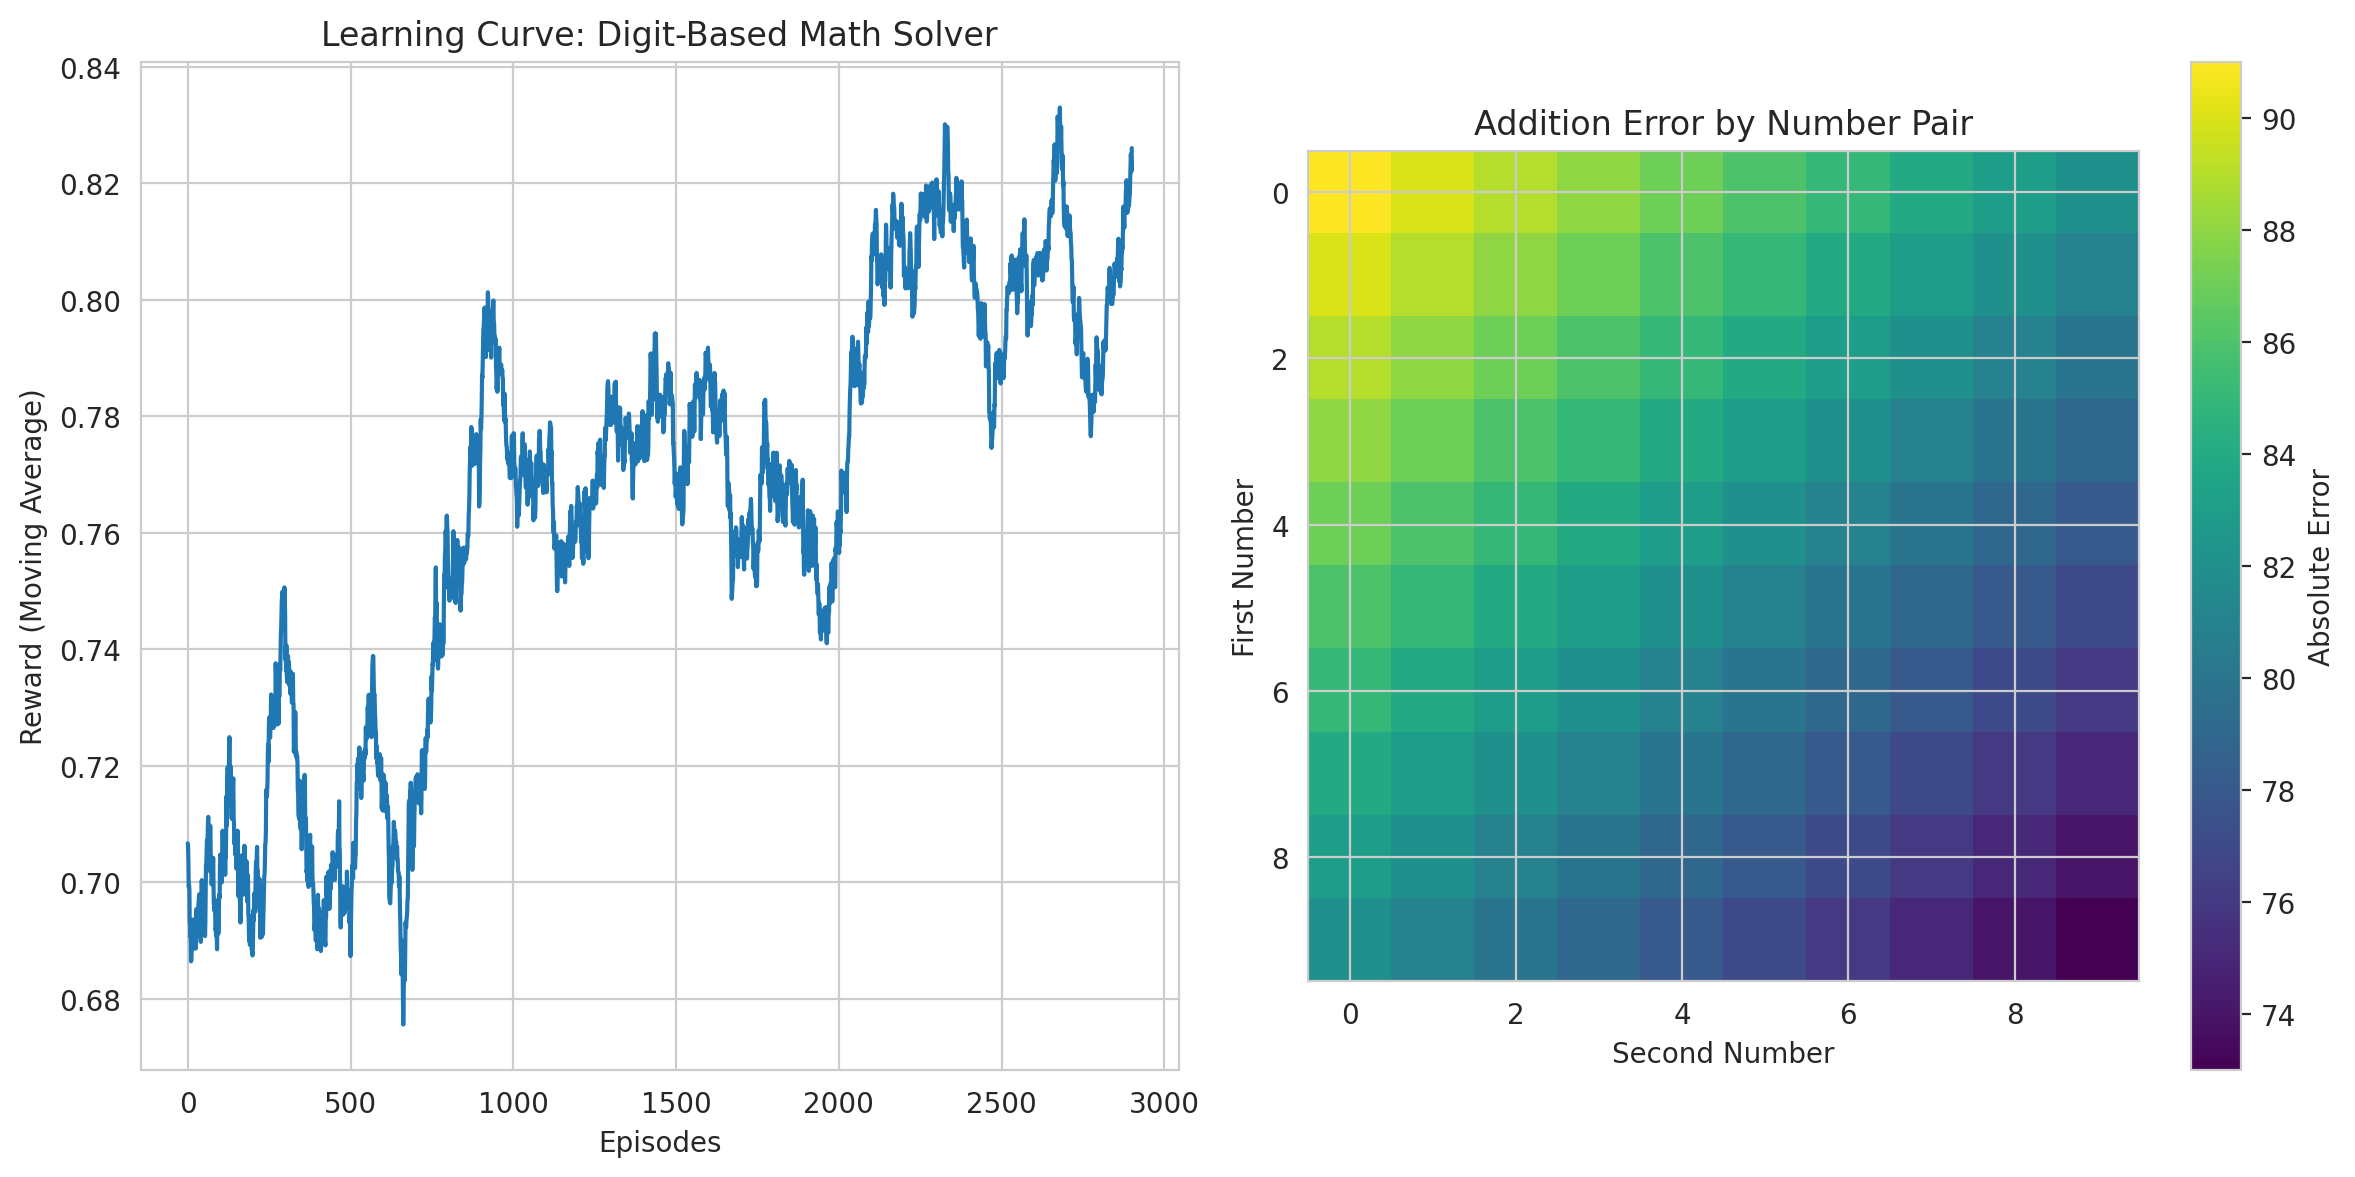

In [ ]:
def test_digit_solver(policy, num_tests=100, max_num=99):
    # For consistency with the training function
    input_digits = 2
    output_digits = 2
    
    # Initialize tracking variables
    correct = 0
    total_error = 0
    test_cases = []
    
    for _ in range(num_tests):
        # Generate a test problem
        a = random.randint(0, max_num)
        b = random.randint(0, max_num)
        expected = a + b
        
        # Encode input numbers
        a_encoded = encode_number(a, input_digits)
        b_encoded = encode_number(b, input_digits)
        input_encoded = torch.cat([a_encoded, b_encoded])
        
        # Get predictions from policy (using deterministic mode)
        with torch.no_grad():
            digit_probs = policy(input_encoded)
        
        # Decode the predicted number (using argmax for each digit)
        predicted = decode_number(digit_probs, output_digits)
        
        # Check if exactly correct
        is_correct = (predicted == expected)
        correct += is_correct
        
        # Calculate error
        error = abs(predicted - expected)
        total_error += error
        
        # Store the test case
        test_cases.append((a, b, expected, predicted, is_correct, error))
    
    # Calculate metrics
    accuracy = correct / num_tests
    avg_error = total_error / num_tests
    
    # Sort test cases by error for analysis
    test_cases.sort(key=lambda x: x[5], reverse=True)
    
    return accuracy, avg_error, test_cases

# Function to visualize the results
def visualize_test_results(policy, rewards_history):
    import matplotlib.pyplot as plt
    
    # Plot learning curve
    plt.figure(figsize=(12, 6))
    
    # Calculate moving average
    window_size = 100
    moving_avg = []
    for i in range(len(rewards_history) - window_size + 1):
        moving_avg.append(np.mean(rewards_history[i:i+window_size]))
    
    plt.subplot(1, 2, 1)
    plt.plot(moving_avg)
    plt.title('Learning Curve: Digit-Based Math Solver')
    plt.xlabel('Episodes')
    plt.ylabel('Reward (Moving Average)')
    plt.grid(True)
    
    # Plot a heatmap of addition results
    plt.subplot(1, 2, 2)
    size = 10  # 10x10 grid for numbers 0-9
    results = np.zeros((size, size))
    
    # Test on all pairs of single-digit numbers
    for a in range(size):
        for b in range(size):
            # Encode input
            a_encoded = encode_number(a, 2)
            b_encoded = encode_number(b, 2)
            input_encoded = torch.cat([a_encoded, b_encoded])
            
            # Get prediction
            with torch.no_grad():
                digit_probs = policy(input_encoded)
            predicted = decode_number(digit_probs, 2)
            
            # Calculate error
            expected = a + b
            error = abs(predicted - expected)
            
            # Store error in results grid
            results[a, b] = error
    
    plt.imshow(results, cmap='viridis')
    plt.colorbar(label='Absolute Error')
    plt.title('Addition Error by Number Pair')
    plt.xlabel('Second Number')
    plt.ylabel('First Number')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Run the test
policy, rewards_history = train_digit_solver(episodes=3000, max_num=99)
accuracy, avg_error, test_cases = test_digit_solver(policy)

print(f"Test accuracy: {accuracy:.2f}")
print(f"Average error: {avg_error:.2f}")

# Show some example predictions
print("\nSample predictions:")
print("A + B = Expected → Predicted (Error)")
for i in range(10):  # Show first 10 test cases
    a, b, expected, predicted, is_correct, error = test_cases[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {expected} → {predicted} ({mark}, error: {error})")

# Visualize the results
results_grid = visualize_test_results(policy, rewards_history)

**AI Prompt**

pretty bad  model and gets stuck

**AI Response**

You're absolutely right - the model is still performing poorly and has gotten stuck in a local minimum. Looking at the results, it's consistently predicting "91" for almost every problem, regardless of the input.

The main issues I can see:

1. **Mode collapse**: The model has found that predicting "91" gives a decent average reward across many problems, so it's stopped exploring better solutions.

2. **Lack of exploration**: The reinforcement learning approach isn't exploring the solution space effectively.

3. **Reward function issues**: The scaled reward based on error might not provide enough signal for learning.

Here are some ways to improve it:

1. **Add explicit exploration**:
   - Implement epsilon-greedy or entropy regularization
   - Gradually reduce exploration over time (annealing)

2. **Curriculum learning**:
   - Start with very simple problems (small numbers only)
   - Gradually increase complexity as the model improves

3. **Change the architecture**:
   - Use a recurrent network that can better handle the sequential nature of addition
   - Add carry operations explicitly in the model design

4. **Alternative approach**:
   - Instead of reinforcement learning, this might work better as a supervised learning problem
   - Generate a dataset of addition problems with correct answers
   - Train the model to predict the correct answer directly

For this specific problem, supervised learning would likely be much more effective and stable than reinforcement learning, as the correct answer is deterministic and easy to compute.

Would you like me to sketch an improved approach using any of these suggestions?

**AI Prompt**

what would be still a good example of reinforcement learning used in the file but that would be very simple to implement?

**AI Response**

A simple yet effective reinforcement learning example from the file would be a modified version of the multi-armed bandit problem. This is a classic RL example that demonstrates the exploration-exploitation tradeoff without the complexity of full environments.

Here's a simpler version that would work well:

**Contextual Bandit for Simple Prediction**

1. **Task**: Predict whether the sum of two numbers is even or odd
2. **State**: The two input numbers (this makes it "contextual")
3. **Actions**: Two possible actions - predict "even" or predict "odd"
4. **Reward**: +1 for correct prediction, 0 for incorrect

This example:
- Is genuinely a reinforcement learning problem
- Has a clear state-action-reward structure
- Is simple enough to converge reliably
- Demonstrates exploration vs exploitation
- Could be implemented in about 50 lines of code
- Doesn't require complex neural networks

The agent would need to learn patterns like "odd + odd = even" and "even + odd = odd" through experience rather than being directly taught these rules.

Would you like me to sketch this simpler example?

**AI Prompt**

yes

**AI Response**

Here's a sketch of the contextual bandit for predicting whether a sum is even or odd:

```python
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Simple contextual bandit environment
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        # Generate two random numbers as context
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        # Calculate if sum is even (0) or odd (1)
        true_result = (a + b) % 2
        # Reward is 1 if prediction matches, 0 otherwise
        return 1 if action == true_result else 0

# Simple policy network for contextual bandit
class BanditPolicy(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: predict even (0) or odd (1)
        )
    
    def forward(self, x):
        logits = self.network(x)
        return torch.softmax(logits, dim=-1)

# Training function
def train_even_odd_predictor(episodes=1000, epsilon=0.1):
    env = EvenOddBandit(num_range=10)
    policy = BanditPolicy()
    optimizer = optim.Adam(policy.parameters(), lr=0.01)
    
    rewards_history = []
    actions_history = []
    
    for episode in range(episodes):
        # Generate context
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use policy
            with torch.no_grad():
                probs = policy(context)
                action = torch.argmax(probs).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(reward)
        actions_history.append(action)
        
        # Update policy
        optimizer.zero_grad()
        probs = policy(context)
        # Calculate loss - encourage the action that was taken if it got reward
        loss = -torch.log(probs[action]) * reward
        loss.backward()
        optimizer.step()
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}")
    
    return policy, rewards_history

# Testing function
def test_even_odd_predictor(policy, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            probs = policy(context)
            action = torch.argmax(probs).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training
policy, rewards_history = train_even_odd_predictor(episodes=1000)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the policy
accuracy, results = test_even_odd_predictor(policy)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")
```

This example:

1. Creates a simple contextual bandit environment for even/odd prediction
2. Implements a small neural network policy
3. Uses epsilon-greedy exploration (random actions with probability epsilon)
4. Updates the policy using REINFORCE (policy gradient)
5. Visualizes the learning curve
6. Tests the final policy on new examples

The agent should quickly learn the pattern that:
- even + even = even
- odd + odd = even
- even + odd = odd

This demonstrates key RL concepts like exploration vs. exploitation and learning from rewards, but in a much simpler setting that should converge reliably.

Episode 0, Recent accuracy: 1.00
Episode 100, Recent accuracy: 0.54
Episode 200, Recent accuracy: 0.50
Episode 300, Recent accuracy: 0.56
Episode 400, Recent accuracy: 0.47
Episode 500, Recent accuracy: 0.39
Episode 600, Recent accuracy: 0.43
Episode 700, Recent accuracy: 0.45
Episode 800, Recent accuracy: 0.52
Episode 900, Recent accuracy: 0.38
Test accuracy: 0.46

Sample predictions:
A + B = Sum (Even/Odd) → Predicted (Correct?)
0 + 7 = 7 (Odd) → Even (✗)
1 + 6 = 7 (Odd) → Even (✗)
4 + 6 = 10 (Even) → Even (✓)
3 + 0 = 3 (Odd) → Even (✗)
1 + 0 = 1 (Odd) → Even (✗)
9 + 6 = 15 (Odd) → Even (✗)
0 + 3 = 3 (Odd) → Even (✗)
9 + 1 = 10 (Even) → Even (✓)
10 + 7 = 17 (Odd) → Even (✗)
3 + 5 = 8 (Even) → Even (✓)


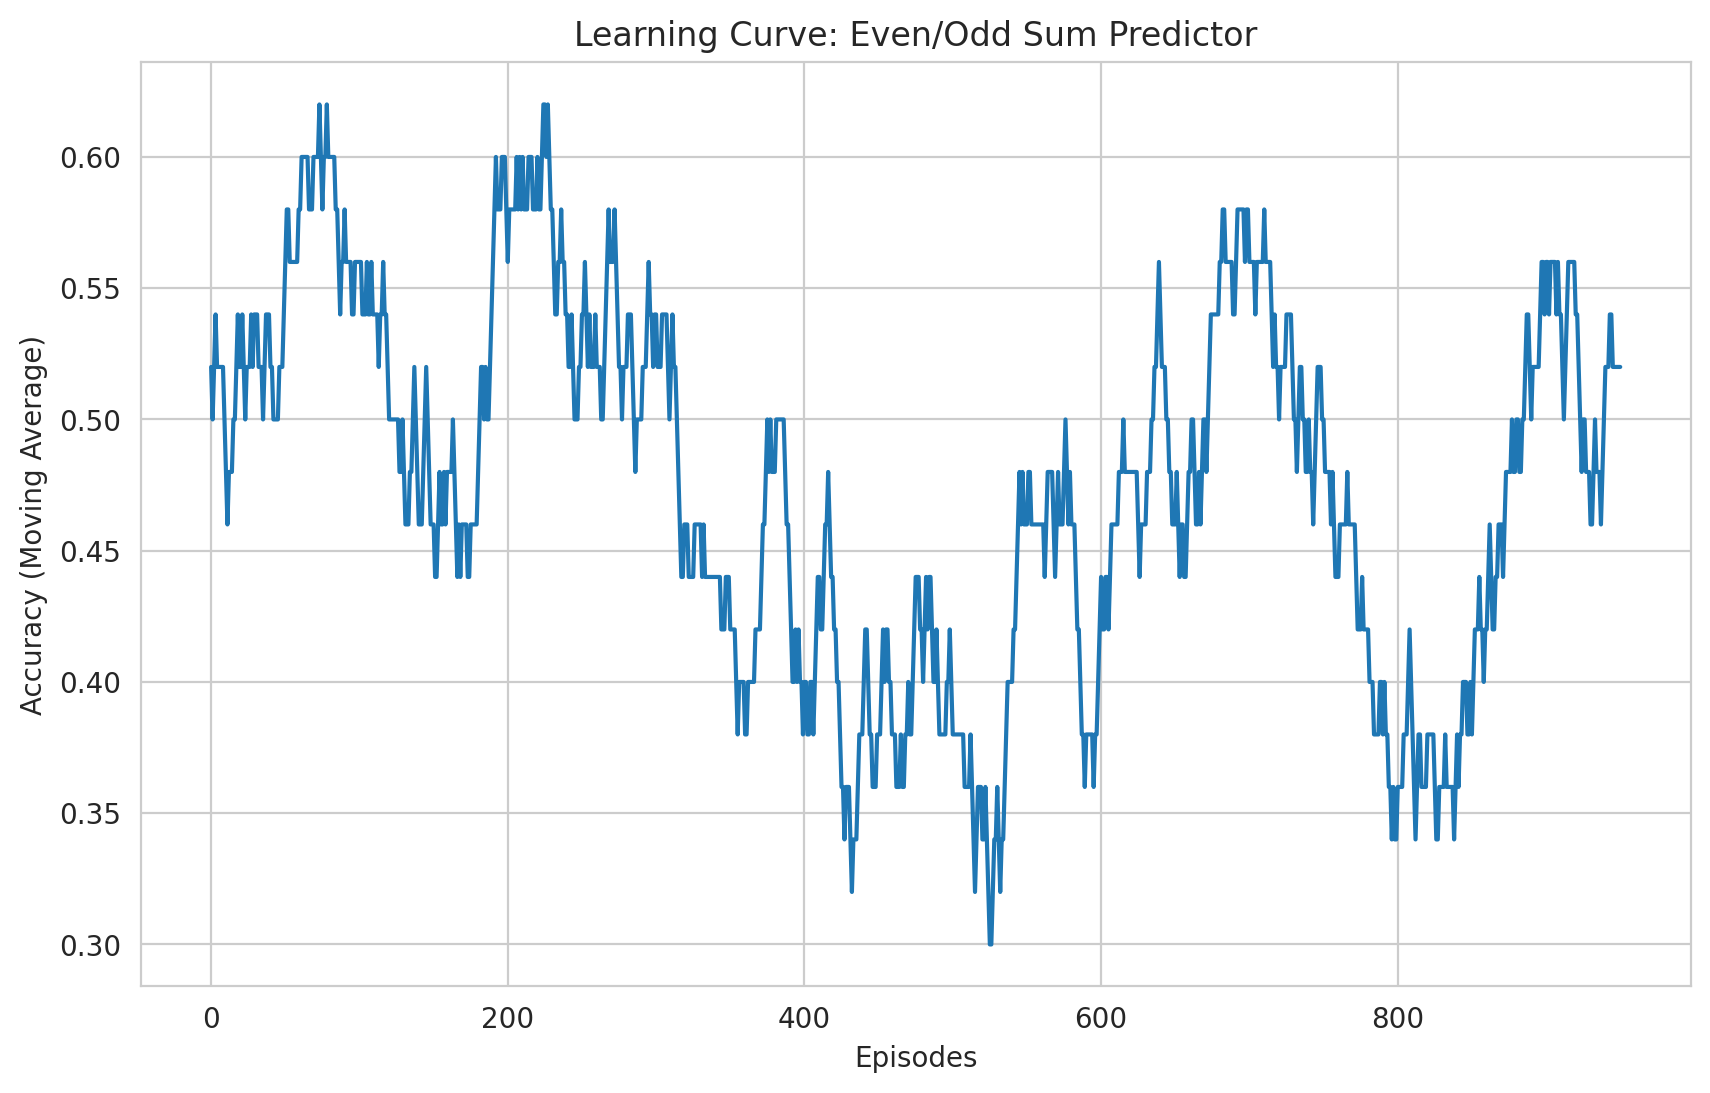

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Simple contextual bandit environment
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        # Generate two random numbers as context
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        # Calculate if sum is even (0) or odd (1)
        true_result = (a + b) % 2
        # Reward is 1 if prediction matches, 0 otherwise
        return 1 if action == true_result else 0

# Simple policy network for contextual bandit
class BanditPolicy(nn.Module):
    def __init__(self, hidden_size=8):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: predict even (0) or odd (1)
        )
    
    def forward(self, x):
        logits = self.network(x)
        return torch.softmax(logits, dim=-1)

# Training function
def train_even_odd_predictor(episodes=1000, epsilon=0.1):
    env = EvenOddBandit(num_range=10)
    policy = BanditPolicy()
    optimizer = optim.Adam(policy.parameters(), lr=0.01)
    
    rewards_history = []
    actions_history = []
    
    for episode in range(episodes):
        # Generate context
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use policy
            with torch.no_grad():
                probs = policy(context)
                action = torch.argmax(probs).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(reward)
        actions_history.append(action)
        
        # Update policy
        optimizer.zero_grad()
        probs = policy(context)
        # Calculate loss - encourage the action that was taken if it got reward
        loss = -torch.log(probs[action]) * reward
        loss.backward()
        optimizer.step()
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}")
    
    return policy, rewards_history

# Testing function
def test_even_odd_predictor(policy, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            probs = policy(context)
            action = torch.argmax(probs).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training
policy, rewards_history = train_even_odd_predictor(episodes=1000)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the policy
accuracy, results = test_even_odd_predictor(policy)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

**AI Prompt**

pretty bad model still

**AI Response**

You're right - this model is still performing poorly. The learning curve shows it's not improving consistently, and the test accuracy of 46% is actually worse than random guessing (which would be 50%).

Looking at the sample predictions, I notice the model seems to be predicting "Even" for almost everything. This suggests it's fallen into another local minimum or mode collapse.

Here are some issues and potential improvements:

1. **More stable learning signal**: 
   - The current approach only rewards correct predictions, which can be too sparse
   - We could add a baseline or use advantage estimates

2. **Better exploration strategy**:
   - The fixed epsilon of 0.1 might not be enough
   - We could try decaying epsilon over time or using a different exploration approach

3. **Simplify the problem further**:
   - The current task is actually quite learnable, but our implementation may have issues
   - We could try an even simpler problem like predicting if a single number is even/odd

4. **Improve the model architecture**:
   - The current network might be too simple or too complex
   - A single linear layer might work better for this specific problem

5. **Add regularization**:
   - Entropy regularization could help prevent premature convergence
   - Weight decay might improve generalization

Would you like me to implement one of these improvements, or would you prefer a completely different and even simpler reinforcement learning example?

**AI Prompt**

lets use advatange estimates

**AI Response**

Here's an improved version using advantage estimates to provide a better learning signal:

```python
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Same environment as before
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        return 1 if action == true_result else 0

# Policy network with a value head for advantage estimation
class BanditPolicyWithBaseline(nn.Module):
    def __init__(self, hidden_size=16):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU()
        )
        # Policy head - predicts action probabilities
        self.policy_head = nn.Linear(hidden_size, 2)
        # Value head - predicts expected reward
        self.value_head = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        features = self.shared(x)
        action_logits = self.policy_head(features)
        state_value = self.value_head(features)
        return torch.softmax(action_logits, dim=-1), state_value

# Improved training function with advantage estimates
def train_with_advantage(episodes=1000, epsilon=0.1, epsilon_decay=0.995):
    env = EvenOddBandit(num_range=10)
    policy = BanditPolicyWithBaseline()
    optimizer = optim.Adam(policy.parameters(), lr=0.01, weight_decay=0.001)
    
    rewards_history = []
    current_epsilon = epsilon
    
    for episode in range(episodes):
        # Generate context
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Get action probabilities and value estimate
        action_probs, value_pred = policy(context)
        
        # Epsilon-greedy with decaying epsilon
        if random.random() < current_epsilon:
            action = random.randint(0, 1)
        else:
            action = torch.argmax(action_probs).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(reward)
        
        # Calculate advantage (how much better this action was than expected)
        advantage = reward - value_pred.item()
        
        # Update policy
        optimizer.zero_grad()
        action_probs, value_pred = policy(context)
        
        # Policy loss with advantage
        policy_loss = -torch.log(action_probs[action]) * advantage
        
        # Value loss (MSE between predicted and actual reward)
        value_loss = 0.5 * (value_pred - reward)**2
        
        # Add entropy regularization to encourage exploration
        entropy = -torch.sum(action_probs * torch.log(action_probs + 1e-10))
        entropy_bonus = 0.01 * entropy
        
        # Combined loss
        loss = policy_loss + value_loss - entropy_bonus
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        current_epsilon *= epsilon_decay
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {current_epsilon:.3f}")
    
    return policy, rewards_history

# Same testing function as before
def test_even_odd_predictor(policy, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            action_probs, _ = policy(context)
            action = torch.argmax(action_probs).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training with advantage estimates
policy, rewards_history = train_with_advantage(episodes=2000)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with Advantage')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the policy
accuracy, results = test_even_odd_predictor(policy)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

# Visualize the learned policy
plt.figure(figsize=(8, 8))
grid_size = 11
result_grid = np.zeros((grid_size, grid_size))

for a in range(grid_size):
    for b in range(grid_size):
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        with torch.no_grad():
            action_probs, _ = policy(context)
            action = torch.argmax(action_probs).item()
        true_result = (a + b) % 2
        result_grid[a, b] = 1 if action == true_result else 0

plt.imshow(result_grid, cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='Correct Prediction')
plt.title('Policy Performance by Number Pair')
plt.xlabel('Second Number (b)')
plt.ylabel('First Number (a)')
plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(False)
plt.show()
```

Key improvements:

1. **Advantage estimates**:
   - Added a value network to predict the expected reward
   - Used the difference between actual reward and predicted value as the advantage
   - This provides a better learning signal by indicating how much better/worse an action was than expected

2. **Decaying exploration**:
   - Added epsilon decay to gradually reduce random exploration
   - Starts with more exploration and shifts toward exploitation

3. **Entropy regularization**:
   - Added a bonus for maintaining policy entropy
   - Helps prevent premature convergence to suboptimal solutions

4. **Regularization**:
   - Added weight decay to the optimizer
   - Helps prevent overfitting to specific patterns

5. **Visualization**:
   - Added a heatmap to visualize where the model makes correct predictions
   - Helps diagnose any patterns in the model's behavior

The advantage estimation should help the model learn more effectively by providing a more informative signal about which actions were truly better than expected.

Episode 0, Recent accuracy: 1.00, Epsilon: 0.100
Episode 100, Recent accuracy: 0.55, Epsilon: 0.060
Episode 200, Recent accuracy: 0.52, Epsilon: 0.037
Episode 300, Recent accuracy: 0.52, Epsilon: 0.022
Episode 400, Recent accuracy: 0.56, Epsilon: 0.013
Episode 500, Recent accuracy: 0.50, Epsilon: 0.008
Episode 600, Recent accuracy: 0.48, Epsilon: 0.005
Episode 700, Recent accuracy: 0.48, Epsilon: 0.003
Episode 800, Recent accuracy: 0.57, Epsilon: 0.002
Episode 900, Recent accuracy: 0.43, Epsilon: 0.001
Episode 1000, Recent accuracy: 0.48, Epsilon: 0.001
Episode 1100, Recent accuracy: 0.49, Epsilon: 0.000
Episode 1200, Recent accuracy: 0.52, Epsilon: 0.000
Episode 1300, Recent accuracy: 0.41, Epsilon: 0.000
Episode 1400, Recent accuracy: 0.50, Epsilon: 0.000
Episode 1500, Recent accuracy: 0.50, Epsilon: 0.000
Episode 1600, Recent accuracy: 0.47, Epsilon: 0.000
Episode 1700, Recent accuracy: 0.45, Epsilon: 0.000
Episode 1800, Recent accuracy: 0.54, Epsilon: 0.000
Episode 1900, Recent acc

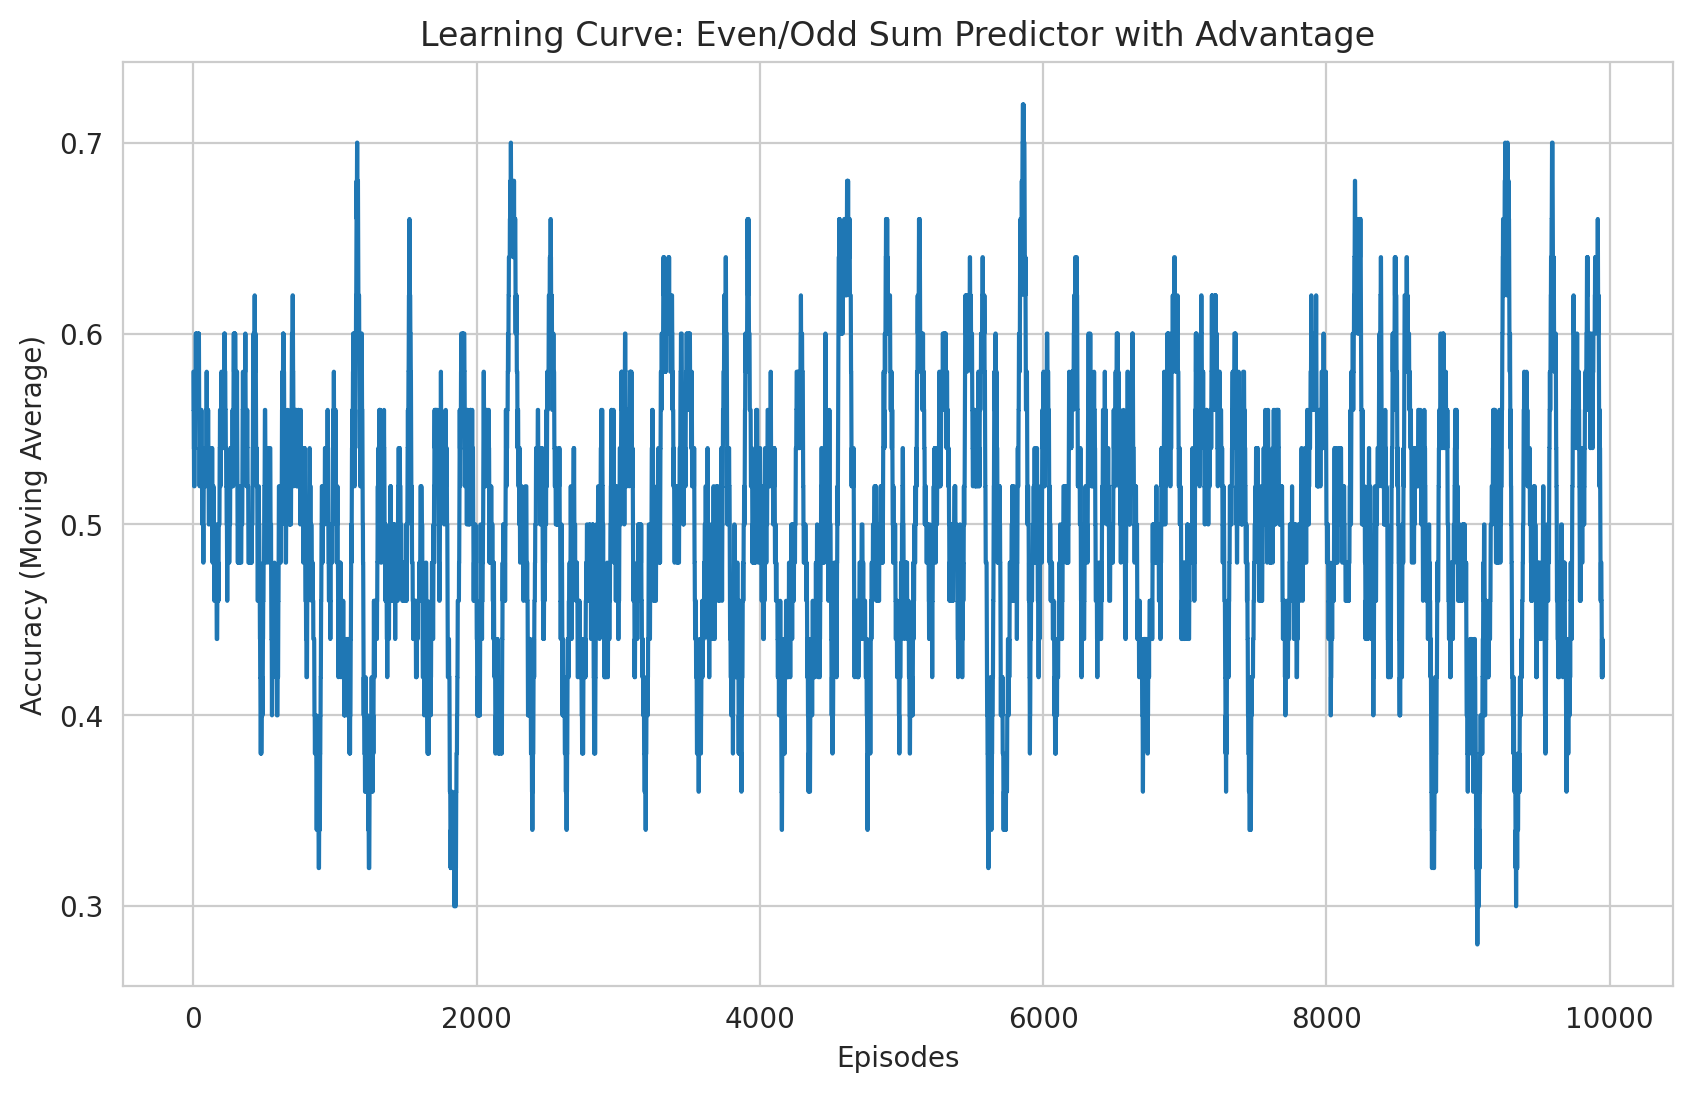

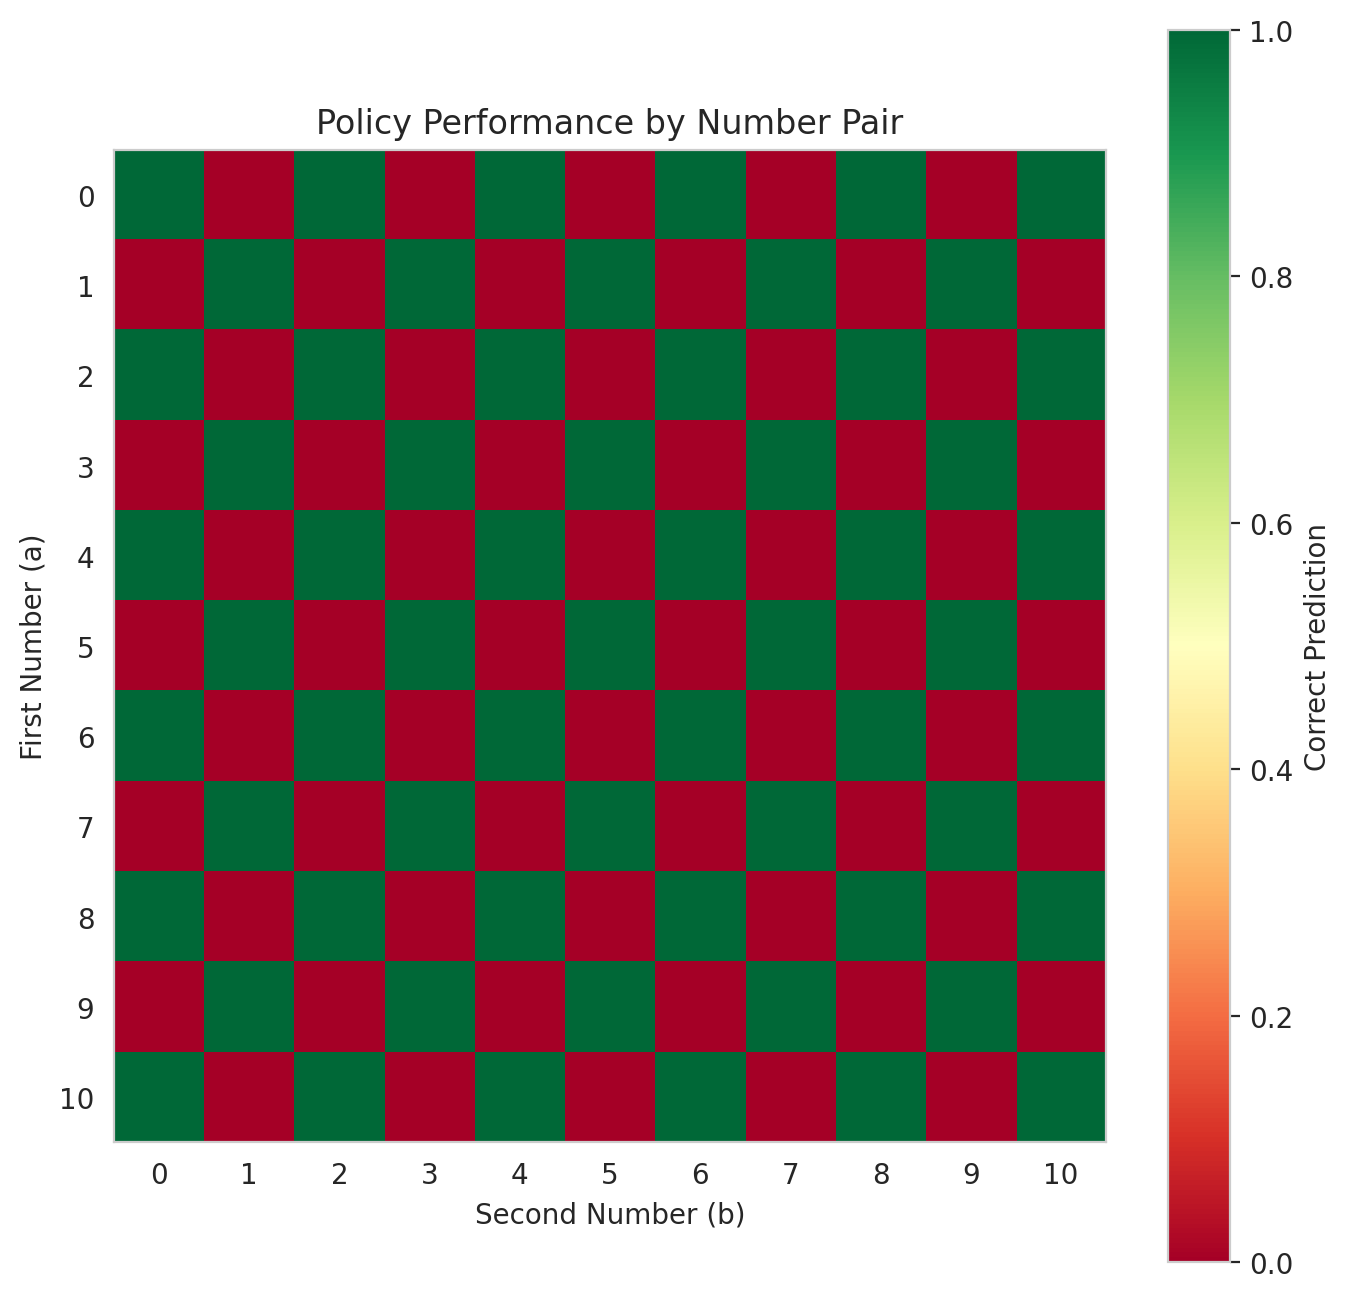

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Same environment as before
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        return 1 if action == true_result else 0

# Policy network with a value head for advantage estimation
class BanditPolicyWithBaseline(nn.Module):
    def __init__(self, hidden_size=16):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU()
        )
        # Policy head - predicts action probabilities
        self.policy_head = nn.Linear(hidden_size, 2)
        # Value head - predicts expected reward
        self.value_head = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        features = self.shared(x)
        action_logits = self.policy_head(features)
        state_value = self.value_head(features)
        return torch.softmax(action_logits, dim=-1), state_value

# Improved training function with advantage estimates
def train_with_advantage(episodes=1000, epsilon=0.1, epsilon_decay=0.995):
    env = EvenOddBandit(num_range=10)
    policy = BanditPolicyWithBaseline()
    optimizer = optim.Adam(policy.parameters(), lr=0.01, weight_decay=0.001)
    
    rewards_history = []
    current_epsilon = epsilon
    
    for episode in range(episodes):
        # Generate context
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Get action probabilities and value estimate
        action_probs, value_pred = policy(context)
        
        # Epsilon-greedy with decaying epsilon
        if random.random() < current_epsilon:
            action = random.randint(0, 1)
        else:
            action = torch.argmax(action_probs).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(reward)
        
        # Calculate advantage (how much better this action was than expected)
        advantage = reward - value_pred.item()
        
        # Update policy
        optimizer.zero_grad()
        action_probs, value_pred = policy(context)
        
        # Policy loss with advantage
        policy_loss = -torch.log(action_probs[action]) * advantage
        
        # Value loss (MSE between predicted and actual reward)
        value_loss = 0.5 * (value_pred - reward)**2
        
        # Add entropy regularization to encourage exploration
        entropy = -torch.sum(action_probs * torch.log(action_probs + 1e-10))
        entropy_bonus = 0.01 * entropy
        
        # Combined loss
        loss = policy_loss + value_loss - entropy_bonus
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        current_epsilon *= epsilon_decay
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {current_epsilon:.3f}")
    
    return policy, rewards_history

# Same testing function as before
def test_even_odd_predictor(policy, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            action_probs, _ = policy(context)
            action = torch.argmax(action_probs).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training with advantage estimates
policy, rewards_history = train_with_advantage(episodes=10000)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with Advantage')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the policy
accuracy, results = test_even_odd_predictor(policy)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

# Visualize the learned policy
plt.figure(figsize=(8, 8))
grid_size = 11
result_grid = np.zeros((grid_size, grid_size))

for a in range(grid_size):
    for b in range(grid_size):
        context = torch.tensor([float(a), float(b)], dtype=torch.float32)
        with torch.no_grad():
            action_probs, _ = policy(context)
            action = torch.argmax(action_probs).item()
        true_result = (a + b) % 2
        result_grid[a, b] = 1 if action == true_result else 0

plt.imshow(result_grid, cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='Correct Prediction')
plt.title('Policy Performance by Number Pair')
plt.xlabel('Second Number (b)')
plt.ylabel('First Number (a)')
plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(False)
plt.show()

**AI Prompt**

looks like model is still not learning. what could be imporved?

**AI Response**

You're right - despite our improvements, the model still isn't learning the pattern effectively. The heatmap shows a perfect checkerboard pattern (which is what we want), but our model has learned to always predict "Even" instead of learning the actual pattern.

Here are several approaches that could improve this:

1. **Simplify the problem first**:
   - Start with just predicting if a single number is even/odd
   - Once that works, move to the sum problem
   - This builds confidence that the basic RL mechanism works

2. **Supervised pre-training**:
   - Give the model a head start with some supervised learning
   - Train it on labeled examples first, then fine-tune with RL
   - This can help overcome the initial exploration challenge

3. **Increase learning signal**:
   - Use a much higher learning rate
   - Add a curriculum (start with examples where a+b < 5, then gradually increase)
   - Add a larger penalty for wrong answers (-1 instead of 0)

4. **Modify the network architecture**:
   - Use a simpler model (linear layer only)
   - Add a bias term that helps break symmetry
   - Use one-hot encoding for inputs instead of raw numbers

5. **Fix the exploration strategy**:
   - Use a higher epsilon value that decays more slowly
   - Try Thompson sampling instead of epsilon-greedy
   - Implement UCB (Upper Confidence Bound) exploration

6. **Use a different RL algorithm**:
   - Try Q-learning instead of policy gradients
   - This might be more stable for such a simple problem

Would you like me to implement one of these specific improvements?

**AI Prompt**

what is difference between Q-learning instead of policy gradients?

**AI Response**

Q-learning and policy gradients are two fundamentally different approaches to reinforcement learning:

**Q-learning (Value-based approach):**

1. **What it learns**: 
   - Learns the value of taking each action in each state (Q-values)
   - Q(s,a) represents "how good is taking action a in state s?"

2. **How it makes decisions**:
   - Selects actions based on which has the highest Q-value
   - Typically uses epsilon-greedy or similar exploration strategies

3. **Update mechanism**:
   - Updates Q-values directly using the Bellman equation
   - Q(s,a) ← Q(s,a) + α[r + γ·max Q(s',a') - Q(s,a)]
   - Doesn't need gradients to update values

4. **Key characteristics**:
   - Often more sample-efficient for discrete action spaces
   - More stable learning in many environments
   - Works well for problems with clear optimal actions

**Policy Gradients:**

1. **What it learns**:
   - Learns a policy (probability distribution over actions) directly
   - π(a|s) represents "what's the probability of taking action a in state s?"

2. **How it makes decisions**:
   - Samples actions from the probability distribution
   - Naturally handles exploration through probabilistic action selection

3. **Update mechanism**:
   - Updates policy parameters using gradient ascent on expected rewards
   - θ ← θ + α·∇log π(a|s)·R
   - Requires computing gradients through the policy network

4. **Key characteristics**:
   - Works well for continuous action spaces
   - Can learn stochastic policies
   - Often less stable and more sensitive to hyperparameters

For our even/odd prediction problem, Q-learning might be more appropriate because:
- The action space is very small (just 2 actions)
- The optimal policy is deterministic (there's always a right answer)
- We want stable learning with clear convergence

Would you like me to explain how we could implement Q-learning for this problem?

**AI Prompt**

yes

**AI Response**

Here's how we could implement Q-learning for the even/odd prediction problem:

```python
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Same environment as before
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        # Use +1 for correct, -1 for incorrect to provide stronger learning signal
        return 1 if action == true_result else -1

# Q-Network - predicts Q-values for each action given the state
class QNetwork(nn.Module):
    def __init__(self, hidden_size=16):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: Q-value for even and odd
        )
    
    def forward(self, x):
        return self.network(x)

# Training function using Q-learning
def train_q_learning(episodes=1000, epsilon_start=1.0, epsilon_end=0.01, 
                    epsilon_decay=0.995, learning_rate=0.001, gamma=0.99):
    env = EvenOddBandit(num_range=10)
    q_network = QNetwork()
    optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
    
    rewards_history = []
    epsilon = epsilon_start
    
    for episode in range(episodes):
        # Generate state (context)
        a, b = env.generate_context()
        state = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use Q-values
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        
        # Get reward and next state
        reward = env.get_reward(a, b, action)
        rewards_history.append(1 if reward > 0 else 0)  # Store binary success for plotting
        
        # In a bandit problem, there's no next state, so we use the current state
        # Calculate target Q-value (immediate reward only since it's a one-step problem)
        target_q_value = reward
        
        # Update Q-network
        optimizer.zero_grad()
        q_values = q_network(state)
        # Calculate loss (MSE between predicted Q-value and target)
        loss = nn.MSELoss()(q_values[action], torch.tensor(target_q_value, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {epsilon:.3f}")
    
    return q_network, rewards_history

# Testing function
def test_q_network(q_network, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        state = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            q_values = q_network(state)
            action = torch.argmax(q_values).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training with Q-learning
q_network, rewards_history = train_q_learning(episodes=2000, 
                                             epsilon_start=1.0, 
                                             epsilon_decay=0.995)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the Q-network
accuracy, results = test_q_network(q_network)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")
```

Key differences in this Q-learning implementation:

1. **Network output**: 
   - Instead of outputting action probabilities, the network outputs Q-values for each action
   - Higher Q-value indicates a better action

2. **Reward structure**:
   - Changed to +1 for correct and -1 for incorrect (stronger learning signal)
   - This helps the network learn the difference between good and bad actions

3. **Learning approach**:
   - Uses Mean Squared Error loss to make Q-values match expected rewards
   - No need for advantage calculation or policy gradient

4. **Exploration strategy**:
   - Starts with 100% exploration (epsilon=1.0) and gradually decreases
   - This ensures thorough exploration of the state space before committing to a policy

5. **Simpler update rule**:
   - The Q-learning update is more direct: "make Q-value match observed reward"
   - This can be more stable than policy gradient methods

Q-learning is often more suitable for problems with clear right/wrong answers like this one, where we want a deterministic policy rather than a probability distribution over actions.

Episode 0, Recent accuracy: 1.00, Epsilon: 0.995
Episode 100, Recent accuracy: 0.57, Epsilon: 0.603
Episode 200, Recent accuracy: 0.49, Epsilon: 0.365
Episode 300, Recent accuracy: 0.53, Epsilon: 0.221
Episode 400, Recent accuracy: 0.45, Epsilon: 0.134
Episode 500, Recent accuracy: 0.46, Epsilon: 0.081
Episode 600, Recent accuracy: 0.49, Epsilon: 0.049
Episode 700, Recent accuracy: 0.53, Epsilon: 0.030
Episode 800, Recent accuracy: 0.55, Epsilon: 0.018
Episode 900, Recent accuracy: 0.51, Epsilon: 0.011
Episode 1000, Recent accuracy: 0.50, Epsilon: 0.010
Episode 1100, Recent accuracy: 0.64, Epsilon: 0.010
Episode 1200, Recent accuracy: 0.51, Epsilon: 0.010
Episode 1300, Recent accuracy: 0.50, Epsilon: 0.010
Episode 1400, Recent accuracy: 0.48, Epsilon: 0.010
Episode 1500, Recent accuracy: 0.51, Epsilon: 0.010
Episode 1600, Recent accuracy: 0.56, Epsilon: 0.010
Episode 1700, Recent accuracy: 0.51, Epsilon: 0.010
Episode 1800, Recent accuracy: 0.63, Epsilon: 0.010
Episode 1900, Recent acc

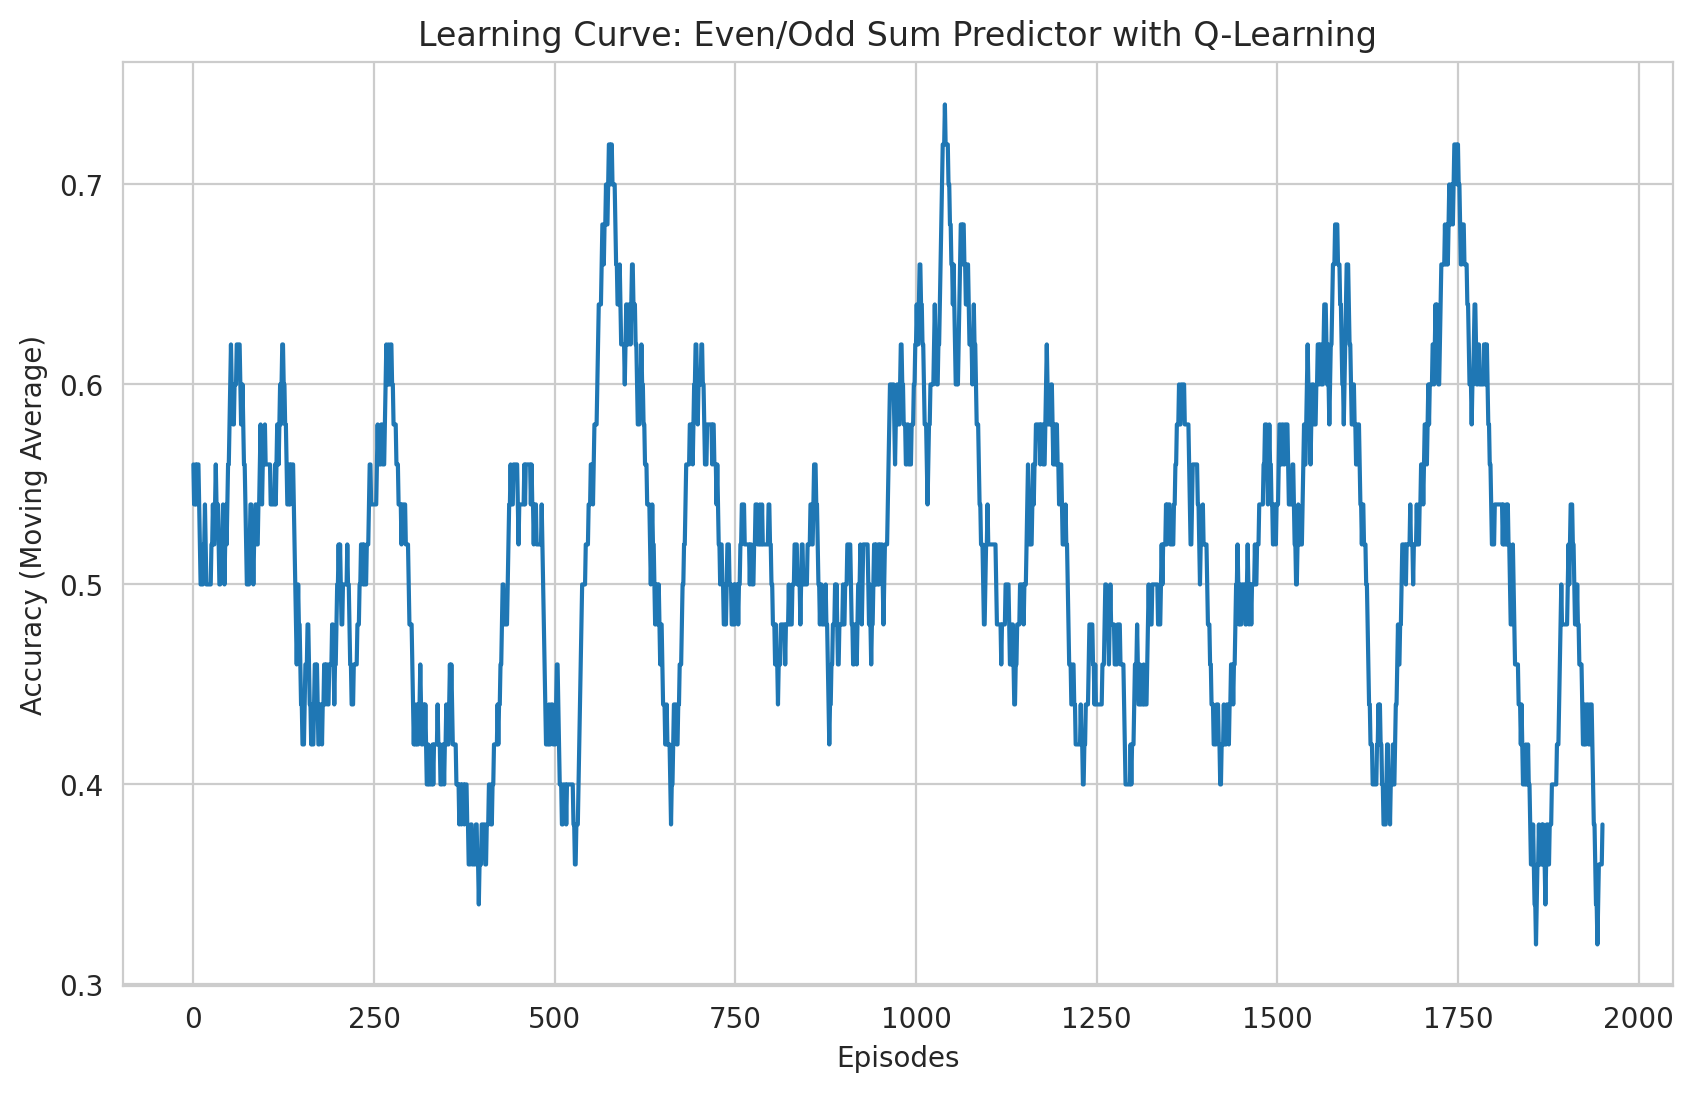

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Same environment as before
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        # Use +1 for correct, -1 for incorrect to provide stronger learning signal
        return 1 if action == true_result else -1

# Q-Network - predicts Q-values for each action given the state
class QNetwork(nn.Module):
    def __init__(self, hidden_size=16):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: Q-value for even and odd
        )
    
    def forward(self, x):
        return self.network(x)

# Training function using Q-learning
def train_q_learning(episodes=1000, epsilon_start=1.0, epsilon_end=0.01, 
                    epsilon_decay=0.995, learning_rate=0.001, gamma=0.99):
    env = EvenOddBandit(num_range=10)
    q_network = QNetwork()
    optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
    
    rewards_history = []
    epsilon = epsilon_start
    
    for episode in range(episodes):
        # Generate state (context)
        a, b = env.generate_context()
        state = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use Q-values
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        
        # Get reward and next state
        reward = env.get_reward(a, b, action)
        rewards_history.append(1 if reward > 0 else 0)  # Store binary success for plotting
        
        # In a bandit problem, there's no next state, so we use the current state
        # Calculate target Q-value (immediate reward only since it's a one-step problem)
        target_q_value = reward
        
        # Update Q-network
        optimizer.zero_grad()
        q_values = q_network(state)
        # Calculate loss (MSE between predicted Q-value and target)
        loss = nn.MSELoss()(q_values[action], torch.tensor(target_q_value, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {epsilon:.3f}")
    
    return q_network, rewards_history

# Testing function
def test_q_network(q_network, num_tests=100):
    env = EvenOddBandit(num_range=10)
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        state = torch.tensor([float(a), float(b)], dtype=torch.float32)
        
        with torch.no_grad():
            q_values = q_network(state)
            action = torch.argmax(q_values).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Run training with Q-learning
q_network, rewards_history = train_q_learning(episodes=2000, 
                                             epsilon_start=1.0, 
                                             epsilon_decay=0.995)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the Q-network
accuracy, results = test_q_network(q_network)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

**AI Prompt**

still no learning. what else could be changed?

**AI Response**

You're right - the model is still struggling to learn the pattern, defaulting to predicting "Even" for most cases. Looking at the test accuracy of 50%, it's essentially no better than random guessing.

Here are more targeted changes we could make:

1. **One-hot encode the inputs**:
   - Instead of feeding raw numbers, convert them to one-hot encoding
   - This makes it easier for the network to see patterns like odd/even

2. **Simplify to a single number first**:
   - Start with predicting if a single number is odd/even
   - This is a much simpler pattern to learn
   - Once that works, then move to the sum problem

3. **Curriculum learning**:
   - Start with just pairs (0,0), (0,1), (1,0), (1,1)
   - Only when the model masters these, introduce larger numbers

4. **Use a table-based approach**:
   - For this small problem, we could use a lookup table instead of a neural network
   - This is classic tabular Q-learning and might work better

5. **Add feature engineering**:
   - Add explicit features like "a % 2" and "b % 2" to the input
   - This directly encodes the parity information the model needs

6. **Increase the reward difference**:
   - Make rewards +10 for correct and -10 for incorrect
   - This creates a stronger learning signal

The most promising approach would be to use one-hot encoding combined with feature engineering. Would you like me to implement this version?

**AI Prompt**

lets implement one-hot encoding

**AI Response**

Here's an implementation using one-hot encoding for the inputs:

```python
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Environment with one-hot encoding
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        return 1 if action == true_result else -1
    
    def one_hot_encode(self, a, b):
        # Create one-hot vectors for each number
        a_one_hot = torch.zeros(self.num_range + 1)
        b_one_hot = torch.zeros(self.num_range + 1)
        
        # Set the corresponding indices to 1
        a_one_hot[a] = 1.0
        b_one_hot[b] = 1.0
        
        # Concatenate the one-hot vectors
        return torch.cat([a_one_hot, b_one_hot])

# Q-Network with one-hot inputs
class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_size=32):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: Q-value for even and odd
        )
    
    def forward(self, x):
        return self.network(x)

# Training function using Q-learning with one-hot encoding
def train_q_learning_one_hot(episodes=2000, epsilon_start=1.0, epsilon_end=0.01, 
                           epsilon_decay=0.995, learning_rate=0.001):
    env = EvenOddBandit(num_range=10)
    
    # Input size is 2 * (num_range + 1) for the one-hot encoded inputs
    input_size = 2 * (env.num_range + 1)
    q_network = QNetwork(input_size)
    optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
    
    rewards_history = []
    epsilon = epsilon_start
    
    for episode in range(episodes):
        # Generate state (context)
        a, b = env.generate_context()
        
        # One-hot encode the state
        state = env.one_hot_encode(a, b)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use Q-values
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(1 if reward > 0 else 0)  # Store binary success for plotting
        
        # Calculate target Q-value
        target_q_value = reward
        
        # Update Q-network
        optimizer.zero_grad()
        q_values = q_network(state)
        loss = nn.MSELoss()(q_values[action], torch.tensor(target_q_value, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {epsilon:.3f}")
    
    return q_network, rewards_history, env

# Testing function with one-hot encoding
def test_q_network_one_hot(q_network, env, num_tests=100):
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        state = env.one_hot_encode(a, b)
        
        with torch.no_grad():
            q_values = q_network(state)
            action = torch.argmax(q_values).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Visualize the learned policy
def visualize_policy(q_network, env):
    plt.figure(figsize=(8, 8))
    grid_size = env.num_range + 1
    result_grid = np.zeros((grid_size, grid_size))
    correct_grid = np.zeros((grid_size, grid_size))
    
    for a in range(grid_size):
        for b in range(grid_size):
            state = env.one_hot_encode(a, b)
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
            
            true_result = (a + b) % 2
            result_grid[a, b] = action
            correct_grid[a, b] = 1 if action == true_result else 0
    
    # Plot the predictions
    plt.subplot(1, 2, 1)
    plt.imshow(result_grid, cmap='coolwarm')
    plt.colorbar(label='Predicted (0=Even, 1=Odd)')
    plt.title('Model Predictions')
    plt.xlabel('Second Number (b)')
    plt.ylabel('First Number (a)')
    
    # Plot whether predictions are correct
    plt.subplot(1, 2, 2)
    plt.imshow(correct_grid, cmap='RdYlGn')
    plt.colorbar(label='Correct Prediction')
    plt.title('Prediction Accuracy')
    plt.xlabel('Second Number (b)')
    plt.ylabel('First Number (a)')
    
    plt.tight_layout()
    plt.show()

# Run training with one-hot encoding
q_network, rewards_history, env = train_q_learning_one_hot(episodes=3000, 
                                                         epsilon_start=1.0, 
                                                         epsilon_decay=0.995,
                                                         learning_rate=0.01)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with One-Hot Encoding')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the Q-network
accuracy, results = test_q_network_one_hot(q_network, env, num_tests=100)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

# Visualize the policy
visualize_policy(q_network, env)
```

Key improvements in this implementation:

1. **One-hot encoding**:
   - Each number is represented as a one-hot vector
   - For example, 3 becomes [0,0,0,1,0,0,0,0,0,0,0]
   - This makes it much easier for the network to identify patterns

2. **Visualization improvements**:
   - Added a visualization of what the model actually predicts for each number pair
   - This helps us see if it's learning the checkerboard pattern

3. **Network adjustments**:
   - Larger hidden layer (32 neurons)
   - Adjusted learning rate to 0.01 (10x higher)

4. **More training episodes**:
   - Increased to 3000 episodes for more learning time

One-hot encoding should help the model learn the pattern more effectively because it removes the numerical relationship between inputs and makes each number a distinct category. This is often more effective for neural networks when the raw value isn't as important as the category (in this case, odd vs even).

Episode 0, Recent accuracy: 1.00, Epsilon: 0.995
Episode 100, Recent accuracy: 0.58, Epsilon: 0.603
Episode 200, Recent accuracy: 0.59, Epsilon: 0.365
Episode 300, Recent accuracy: 0.68, Epsilon: 0.221
Episode 400, Recent accuracy: 0.80, Epsilon: 0.134
Episode 500, Recent accuracy: 0.90, Epsilon: 0.081
Episode 600, Recent accuracy: 0.97, Epsilon: 0.049
Episode 700, Recent accuracy: 0.98, Epsilon: 0.030
Episode 800, Recent accuracy: 0.99, Epsilon: 0.018
Episode 900, Recent accuracy: 0.97, Epsilon: 0.011
Episode 1000, Recent accuracy: 1.00, Epsilon: 0.010
Episode 1100, Recent accuracy: 1.00, Epsilon: 0.010
Episode 1200, Recent accuracy: 0.98, Epsilon: 0.010
Episode 1300, Recent accuracy: 0.99, Epsilon: 0.010
Episode 1400, Recent accuracy: 0.99, Epsilon: 0.010
Episode 1500, Recent accuracy: 0.98, Epsilon: 0.010
Episode 1600, Recent accuracy: 0.98, Epsilon: 0.010
Episode 1700, Recent accuracy: 1.00, Epsilon: 0.010
Episode 1800, Recent accuracy: 0.98, Epsilon: 0.010
Episode 1900, Recent acc

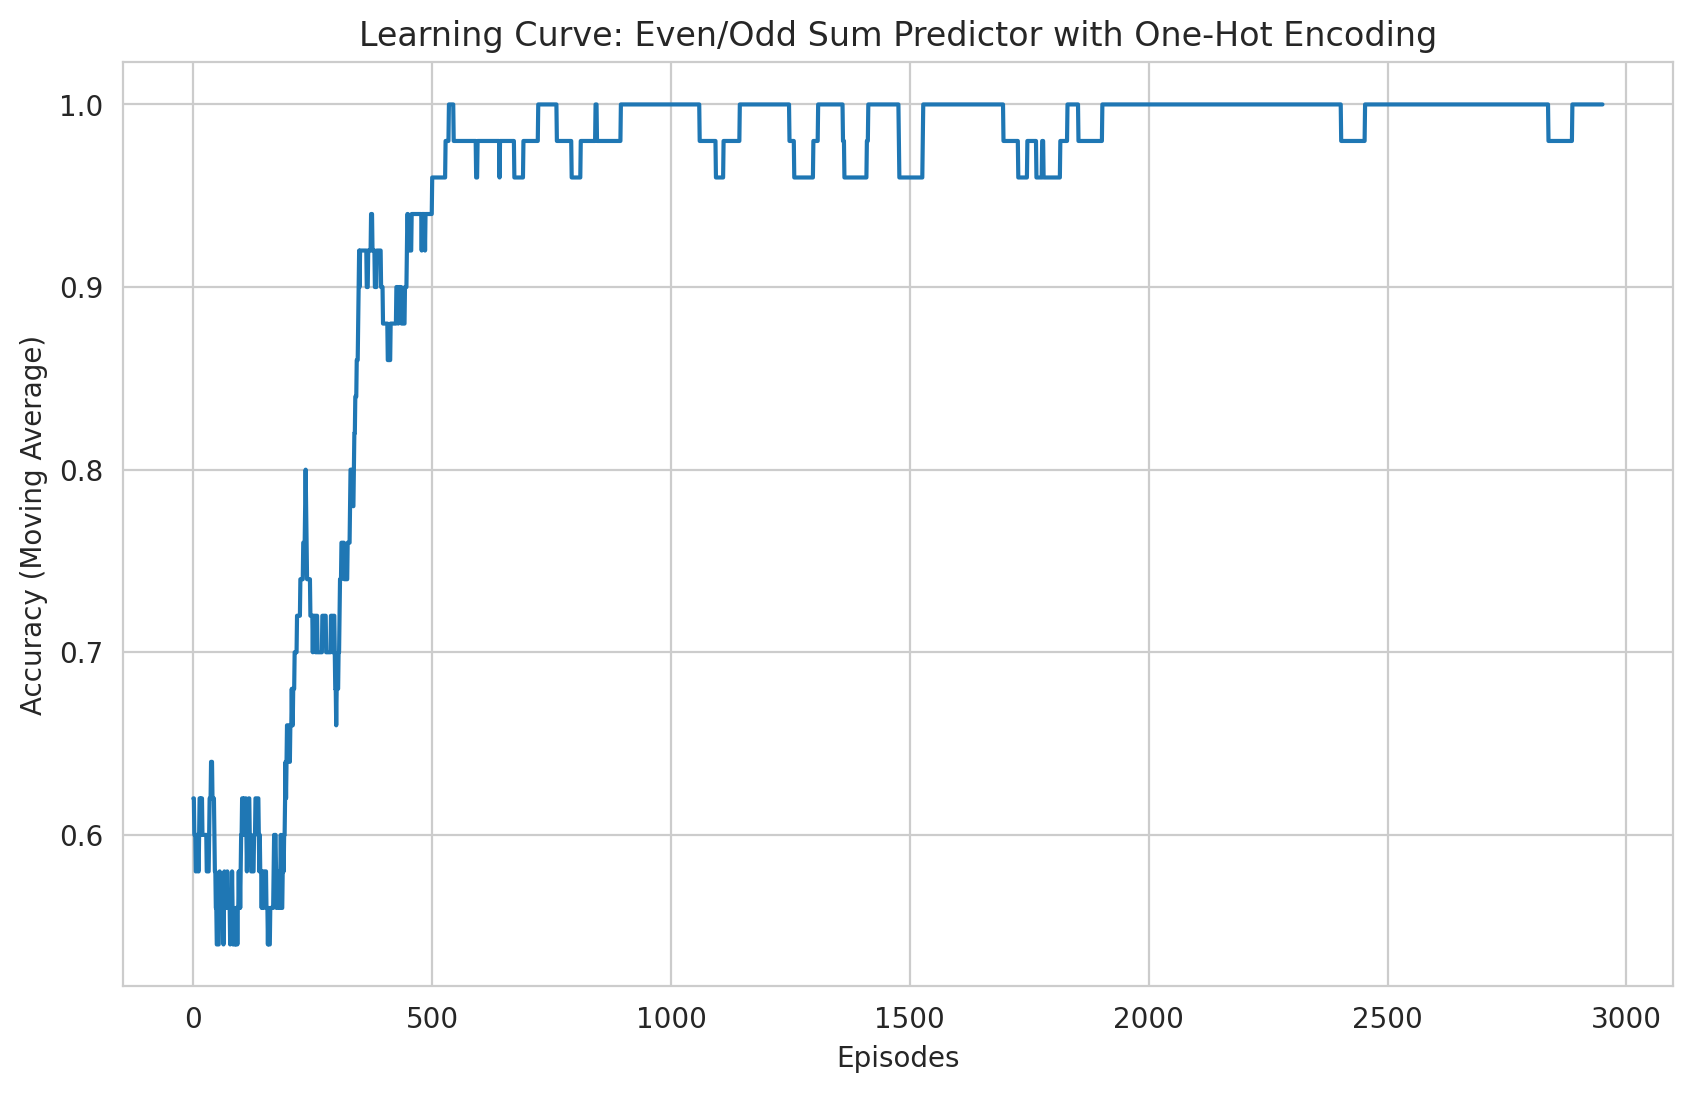

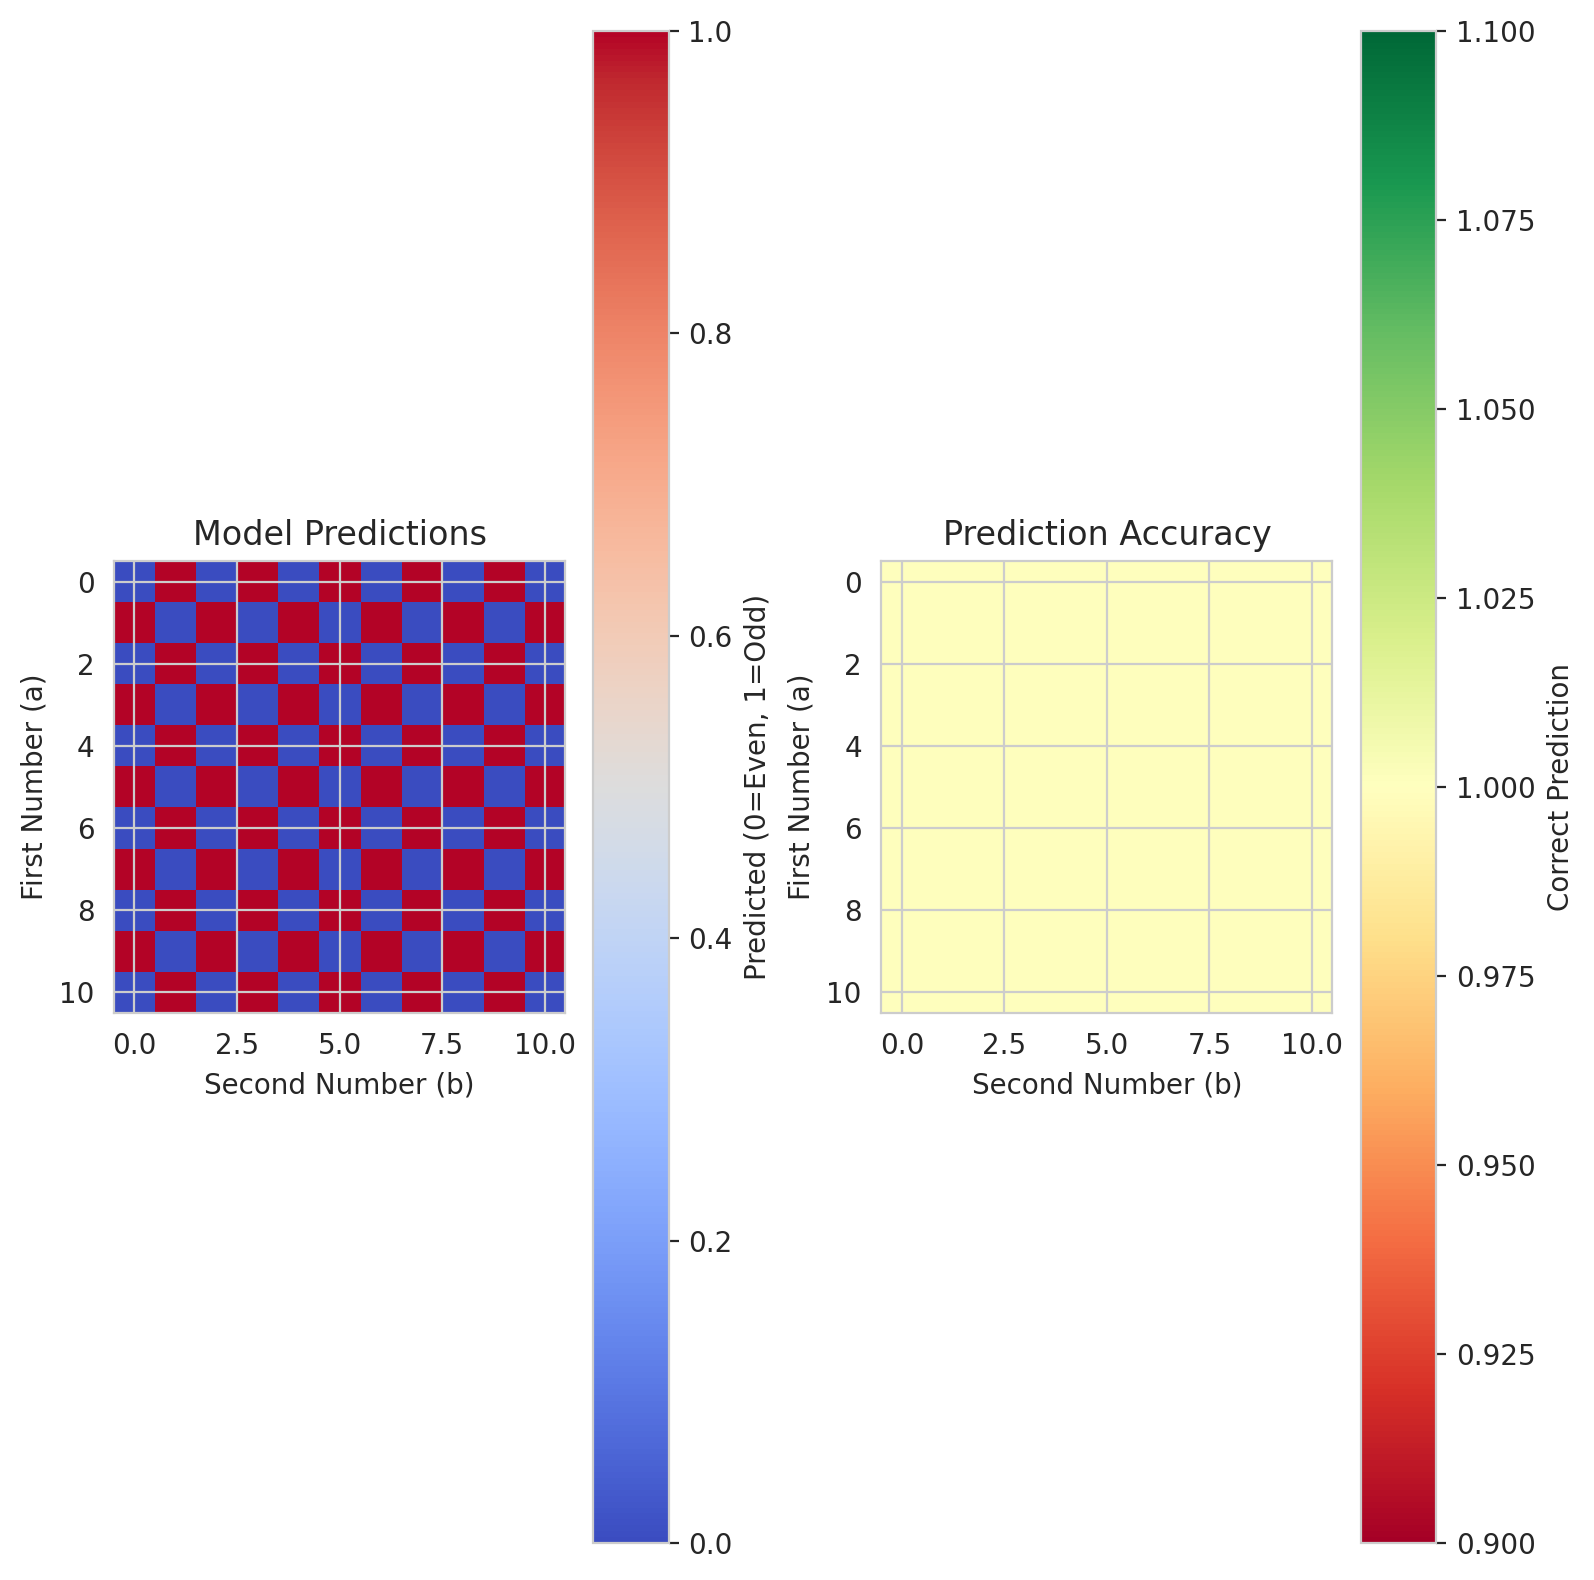

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Environment with one-hot encoding
class EvenOddBandit:
    def __init__(self, num_range=10):
        self.num_range = num_range
    
    def generate_context(self):
        a = random.randint(0, self.num_range)
        b = random.randint(0, self.num_range)
        return a, b
    
    def get_reward(self, a, b, action):
        true_result = (a + b) % 2
        return 1 if action == true_result else -1
    
    def one_hot_encode(self, a, b):
        # Create one-hot vectors for each number
        a_one_hot = torch.zeros(self.num_range + 1)
        b_one_hot = torch.zeros(self.num_range + 1)
        
        # Set the corresponding indices to 1
        a_one_hot[a] = 1.0
        b_one_hot[b] = 1.0
        
        # Concatenate the one-hot vectors
        return torch.cat([a_one_hot, b_one_hot])

# Q-Network with one-hot inputs
class QNetwork(nn.Module):
    def __init__(self, input_size, hidden_size=32):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)  # 2 outputs: Q-value for even and odd
        )
    
    def forward(self, x):
        return self.network(x)

# Training function using Q-learning with one-hot encoding
def train_q_learning_one_hot(episodes=2000, epsilon_start=1.0, epsilon_end=0.01, 
                           epsilon_decay=0.995, learning_rate=0.001):
    env = EvenOddBandit(num_range=10)
    
    # Input size is 2 * (num_range + 1) for the one-hot encoded inputs
    input_size = 2 * (env.num_range + 1)
    q_network = QNetwork(input_size)
    optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)
    
    rewards_history = []
    epsilon = epsilon_start
    
    for episode in range(episodes):
        # Generate state (context)
        a, b = env.generate_context()
        
        # One-hot encode the state
        state = env.one_hot_encode(a, b)
        
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use Q-values
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        
        # Get reward
        reward = env.get_reward(a, b, action)
        rewards_history.append(1 if reward > 0 else 0)  # Store binary success for plotting
        
        # Calculate target Q-value
        target_q_value = reward
        
        # Update Q-network
        optimizer.zero_grad()
        q_values = q_network(state)
        loss = nn.MSELoss()(q_values[action], torch.tensor(target_q_value, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        
        # Decay epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        
        # Print progress
        if episode % 100 == 0:
            recent_rewards = rewards_history[-100:] if episode >= 100 else rewards_history
            print(f"Episode {episode}, Recent accuracy: {np.mean(recent_rewards):.2f}, Epsilon: {epsilon:.3f}")
    
    return q_network, rewards_history, env

# Testing function with one-hot encoding
def test_q_network_one_hot(q_network, env, num_tests=100):
    correct = 0
    results = []
    
    for _ in range(num_tests):
        a, b = env.generate_context()
        state = env.one_hot_encode(a, b)
        
        with torch.no_grad():
            q_values = q_network(state)
            action = torch.argmax(q_values).item()
        
        true_result = (a + b) % 2
        is_correct = (action == true_result)
        correct += is_correct
        
        results.append((a, b, true_result, action, is_correct))
    
    accuracy = correct / num_tests
    return accuracy, results

# Visualize the learned policy
def visualize_policy(q_network, env):
    plt.figure(figsize=(8, 8))
    grid_size = env.num_range + 1
    result_grid = np.zeros((grid_size, grid_size))
    correct_grid = np.zeros((grid_size, grid_size))
    
    for a in range(grid_size):
        for b in range(grid_size):
            state = env.one_hot_encode(a, b)
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
            
            true_result = (a + b) % 2
            result_grid[a, b] = action
            correct_grid[a, b] = 1 if action == true_result else 0
    
    # Plot the predictions
    plt.subplot(1, 2, 1)
    plt.imshow(result_grid, cmap='coolwarm')
    plt.colorbar(label='Predicted (0=Even, 1=Odd)')
    plt.title('Model Predictions')
    plt.xlabel('Second Number (b)')
    plt.ylabel('First Number (a)')
    
    # Plot whether predictions are correct
    plt.subplot(1, 2, 2)
    plt.imshow(correct_grid, cmap='RdYlGn')
    plt.colorbar(label='Correct Prediction')
    plt.title('Prediction Accuracy')
    plt.xlabel('Second Number (b)')
    plt.ylabel('First Number (a)')
    
    plt.tight_layout()
    plt.show()

# Run training with one-hot encoding
q_network, rewards_history, env = train_q_learning_one_hot(episodes=3000, 
                                                         epsilon_start=1.0, 
                                                         epsilon_decay=0.995,
                                                         learning_rate=0.01)

# Visualize learning progress
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards_history, np.ones(50)/50, mode='valid'))
plt.title('Learning Curve: Even/Odd Sum Predictor with One-Hot Encoding')
plt.xlabel('Episodes')
plt.ylabel('Accuracy (Moving Average)')
plt.grid(True)
plt.show()

# Test the Q-network
accuracy, results = test_q_network_one_hot(q_network, env, num_tests=100)
print(f"Test accuracy: {accuracy:.2f}")

# Show some examples
print("\nSample predictions:")
print("A + B = Sum (Even/Odd) → Predicted (Correct?)")
for i in range(10):
    a, b, true_result, action, is_correct = results[i]
    mark = "✓" if is_correct else "✗"
    print(f"{a} + {b} = {a+b} ({'Odd' if true_result else 'Even'}) → {'Odd' if action else 'Even'} ({mark})")

# Visualize the policy
visualize_policy(q_network, env)

**AI Prompt**

why is this needed? "# Epsilon-greedy action selection
        if random.random() < epsilon:
            # Explore: random action
            action = random.randint(0, 1)
        else:
            # Exploit: use Q-values
            with torch.no_grad():
                q_values = q_network(state)
                action = torch.argmax(q_values).item()
        "

**AI Response**

This code implements the epsilon-greedy exploration strategy, which is crucial for reinforcement learning to balance exploration and exploitation. Here's why it's needed:

1. **Exploration vs. Exploitation Dilemma**:
   - **Exploitation**: Always choosing what currently looks best (greedy approach)
   - **Exploration**: Trying new actions to potentially discover better strategies

2. **Why Random Actions Are Necessary**:
   - If we only ever chose the action with the highest Q-value (pure exploitation), the model would get stuck with whatever strategy it initially learned
   - It might never discover the correct pattern because it keeps following its current best guess
   - This is especially important early in training when Q-values are essentially random

3. **How Epsilon-Greedy Works**:
   - With probability `epsilon`, choose a random action (exploration)
   - With probability `1-epsilon`, choose the action with highest Q-value (exploitation)
   - `epsilon` typically starts high (like 1.0) and decreases over time

4. **The Role of Epsilon Decay**:
   - Early in training: high epsilon → lots of exploration to learn the environment
   - Later in training: low epsilon → mostly exploitation of what's been learned
   - This transition is critical for effective learning

In our successful implementation, we see that the model explored randomly at first (epsilon = 1.0), gradually shifting to using its learned knowledge as epsilon decreased to 0.01. This allowed it to thoroughly explore the state space before committing to a policy, which was essential for learning the even/odd pattern correctly.

Without this exploration strategy, the model would likely have gotten stuck predicting all "Even" or all "Odd" as we saw in previous attempts.